### Libraries

In [335]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Stats and distributions
import scipy.stats as stats

# LR
import statsmodels.api as sm

import seaborn as sns

# Data Cleaning

### Import the data

In [108]:
df = pd.read_csv('kc_house_data.csv')

Based on our earlier exploratory data analysis we will perform the following data cleaning tasks.

#### 1. `waterfront`

There are some `NaN`s, we will encode them to `0` to be consistent with the rest of the data. We believe that `0` indicates the home is not on waterfront.

Before:

In [109]:
df['waterfront'].unique()

array([nan,  0.,  1.])

Cleaning:

In [110]:
df['waterfront'].replace(np.nan, 0, inplace=True)

After:

In [111]:
df['waterfront'].unique()

array([0., 1.])

#### 2. `view`

There are some `NaN`s, we will encode them to `0` to be consistent with the rest of the data. We don't know the actually scale of the 'scores', but think it's most likely they should be `0`.

Before:

In [112]:
df['view'].unique()

array([ 0., nan,  3.,  4.,  2.,  1.])

Cleaning:

In [113]:
df['view'].replace(np.nan, 0, inplace=True)

After:

In [114]:
df['view'].unique()

array([0., 3., 4., 2., 1.])

#### 3. `sqft_basement`

There are rows where the value equals `?`, which caused the column to be coerced to `object`. We will assume (and spot checked to be true) that:  
`sqft_basement = sqft_totliving - sqft_above`  

We will replace all values of that column with this calculation so that they are all consistent.

Before:

In [115]:
df['sqft_basement'].unique()

array(['0.0', '400.0', '910.0', '1530.0', '?', '730.0', '1700.0', '300.0',
       '970.0', '760.0', '720.0', '700.0', '820.0', '780.0', '790.0',
       '330.0', '1620.0', '360.0', '588.0', '1510.0', '410.0', '990.0',
       '600.0', '560.0', '550.0', '1000.0', '1600.0', '500.0', '1040.0',
       '880.0', '1010.0', '240.0', '265.0', '290.0', '800.0', '540.0',
       '710.0', '840.0', '380.0', '770.0', '480.0', '570.0', '1490.0',
       '620.0', '1250.0', '1270.0', '120.0', '650.0', '180.0', '1130.0',
       '450.0', '1640.0', '1460.0', '1020.0', '1030.0', '750.0', '640.0',
       '1070.0', '490.0', '1310.0', '630.0', '2000.0', '390.0', '430.0',
       '850.0', '210.0', '1430.0', '1950.0', '440.0', '220.0', '1160.0',
       '860.0', '580.0', '2060.0', '1820.0', '1180.0', '200.0', '1150.0',
       '1200.0', '680.0', '530.0', '1450.0', '1170.0', '1080.0', '960.0',
       '280.0', '870.0', '1100.0', '460.0', '1400.0', '660.0', '1220.0',
       '900.0', '420.0', '1580.0', '1380.0', '475.0', 

Cleaning:

In [116]:
df['sqft_basement'] = df['sqft_living'] - df['sqft_above']

After:

In [117]:
df['sqft_basement'].value_counts()

0       13110
600       221
700       218
500       214
800       206
400       184
1000      149
900       144
300       142
200       108
530       107
480       106
750       105
450       103
720       102
620        91
580        85
840        85
420        81
860        80
1100       80
670        79
780        77
380        76
850        76
550        76
650        76
680        75
240        74
360        73
        ...  
1525        1
2580        1
2500        1
2180        1
1990        1
1284        1
516         1
276         1
20          1
915         1
2850        1
1798        1
2310        1
266         1
2120        1
1913        1
1481        1
3480        1
3000        1
2600        1
2360        1
1960        1
295         1
1880        1
1816        1
792         1
2590        1
935         1
2390        1
248         1
Name: sqft_basement, Length: 306, dtype: int64

In [118]:
df['sqft_basement'].dtype

dtype('int64')

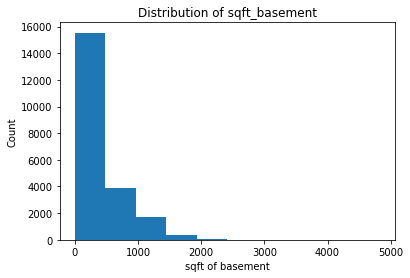

In [119]:
fig, ax = plt.subplots()

ax.hist(df['sqft_basement'])
ax.set_title('Distribution of sqft_basement')
ax.set_ylabel('Count')
ax.set_xlabel('sqft of basement')
plt.show()

#### 4. `yr_renovated`

There are a large number of nulls. We believe that it means that the house has not been renovated yet. There are also a large number with 0 entered, which we believe means the same thing. So for consistency of data we will transform the nulls all into 0s.


Before:

In [120]:
df.loc[df['yr_renovated'].isna() == True,['yr_renovated']].shape[0]

3842

There are 3.8k nulls.

Cleaning:

In [121]:
df['yr_renovated'].replace(np.nan, 0.0, inplace=True)

After:

In [122]:
df.loc[df['yr_renovated'].isna() == True,['yr_renovated']].shape[0]

0

No nulls!

#### 5. `zipcode`

The data was coerced into `int`. In practice zipcodes are more categorical in nature. So in anticpation of applying them as such we will convert them to `str`.


Before:

In [123]:
df['zipcode'].dtype

dtype('int64')

Cleaning:

In [124]:
df['zipcode'] = df['zipcode'].apply(str)

After:

In [125]:
df['zipcode'].dtype

dtype('O')

Let's take at our dataset up to this point:

In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       21597 non-null float64
view             21597 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null int64
yr_built         21597 non-null int64
yr_renovated     21597 non-null float64
zipcode          21597 non-null object
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


Confirming that we have no nulls.

##### 6. `date` 

Now let us add a datetime column; it may come in handy later.

Converting:

In [127]:
df['date_formatted'] = pd.to_datetime(df['date'])

Checking:

In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 22 columns):
id                21597 non-null int64
date              21597 non-null object
price             21597 non-null float64
bedrooms          21597 non-null int64
bathrooms         21597 non-null float64
sqft_living       21597 non-null int64
sqft_lot          21597 non-null int64
floors            21597 non-null float64
waterfront        21597 non-null float64
view              21597 non-null float64
condition         21597 non-null int64
grade             21597 non-null int64
sqft_above        21597 non-null int64
sqft_basement     21597 non-null int64
yr_built          21597 non-null int64
yr_renovated      21597 non-null float64
zipcode           21597 non-null object
lat               21597 non-null float64
long              21597 non-null float64
sqft_living15     21597 non-null int64
sqft_lot15        21597 non-null int64
date_formatted    21597 non-null datetime64[ns]
dtypes

Let's look at a few rows:

In [129]:
df.loc[:,['date','date_formatted']].head()

,date,date_formatted
0,10/13/2014,2014-10-13
1,12/9/2014,2014-12-09
2,2/25/2015,2015-02-25
3,12/9/2014,2014-12-09
4,2/18/2015,2015-02-18


In [130]:
df.loc[:,['date','date_formatted']].tail(10)

,date,date_formatted
21587,8/25/2014,2014-08-25
21588,1/26/2015,2015-01-26
21589,10/14/2014,2014-10-14
21590,3/26/2015,2015-03-26
21591,2/19/2015,2015-02-19
21592,5/21/2014,2014-05-21
21593,2/23/2015,2015-02-23
21594,6/23/2014,2014-06-23
21595,1/16/2015,2015-01-16
21596,10/15/2014,2014-10-15


Looks good.

#### Should we consider binarizing `zipcode`?

Since we consider `zipcode` to be categorical, we should binarize it.

In [131]:
zipcode_binarized = pd.get_dummies(df['zipcode'])

In [132]:
zipcode_binarized.head()


,98001,98002,98003,98004,98005,98006,98007,98008,98010,98011,...,98146,98148,98155,98166,98168,98177,98178,98188,98198,98199
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [133]:
zipcode_binarized.shape

(21597, 70)

This is as we expected.

----

We have performed all our preliminary cleansing. Now we will combine and clean into one dataset for exploring multicollinearity.

Append binarized zip codes:

In [134]:
df_m = pd.concat([df, zipcode_binarized], axis=1)

In [135]:
df_m.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,98146,98148,98155,98166,98168,98177,98178,98188,98198,98199
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,...,0,0,0,0,0,0,1,0,0,0
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


Spot check that `zipcode` and its related binarized columns agree. 

For example, `98146':

In [136]:
df_m.loc[df_m['zipcode']=='98146',['zipcode','98146']].head()

,zipcode,98146
8,98146,1
160,98146,1
217,98146,1
225,98146,1
324,98146,1


Looks good! Let's check one more, `98105`:

In [137]:
df_m.loc[df_m['zipcode']=='98105',['zipcode','98105']].head()

,zipcode,98105
54,98105,1
55,98105,1
211,98105,1
308,98105,1
330,98105,1


Also, before we used the binarized `zipcodes` we should drop one. We will 'arbitrarily' select one.

In [138]:
df_m.drop(['98107'], axis=1, inplace=True)

Additionally, we can now drop `zipcode`.

In [139]:
df_m.drop(['zipcode'], axis=1, inplace=True)

In [140]:
#Check
df_m.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'lat',
       'long', 'sqft_living15', 'sqft_lot15', 'date_formatted', '98001',
       '98002', '98003', '98004', '98005', '98006', '98007', '98008', '98010',
       '98011', '98014', '98019', '98022', '98023', '98024', '98027', '98028',
       '98029', '98030', '98031', '98032', '98033', '98034', '98038', '98039',
       '98040', '98042', '98045', '98052', '98053', '98055', '98056', '98058',
       '98059', '98065', '98070', '98072', '98074', '98075', '98077', '98092',
       '98102', '98103', '98105', '98106', '98108', '98109', '98112', '98115',
       '98116', '98117', '98118', '98119', '98122', '98125', '98126', '98133',
       '98136', '98144', '98146', '98148', '98155', '98166', '98168', '98177',
       '98178', '98188', '98198', '98199'],
      dtype='object')

Let's drop `date` since we have a nicely-formatted version of it now!

In [141]:
df_m.drop(['date'], axis=1, inplace=True)

In [142]:
#Check
df_m.columns

Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'date_formatted', '98001', '98002',
       '98003', '98004', '98005', '98006', '98007', '98008', '98010', '98011',
       '98014', '98019', '98022', '98023', '98024', '98027', '98028', '98029',
       '98030', '98031', '98032', '98033', '98034', '98038', '98039', '98040',
       '98042', '98045', '98052', '98053', '98055', '98056', '98058', '98059',
       '98065', '98070', '98072', '98074', '98075', '98077', '98092', '98102',
       '98103', '98105', '98106', '98108', '98109', '98112', '98115', '98116',
       '98117', '98118', '98119', '98122', '98125', '98126', '98133', '98136',
       '98144', '98146', '98148', '98155', '98166', '98168', '98177', '98178',
       '98188', '98198', '98199'],
      dtype='object')

We've completed all our identified cleaning opportunities for now. However, we may identify other issues as we continue with our analysis. For our we will move on to analyzing our potential predictors for multicollinearity. 

----

# Multicollinearity Analysis

In [144]:
selected = [col for col in df_m.columns]
selected = selected[2:]
selected

['bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15',
 'date_formatted',
 '98001',
 '98002',
 '98003',
 '98004',
 '98005',
 '98006',
 '98007',
 '98008',
 '98010',
 '98011',
 '98014',
 '98019',
 '98022',
 '98023',
 '98024',
 '98027',
 '98028',
 '98029',
 '98030',
 '98031',
 '98032',
 '98033',
 '98034',
 '98038',
 '98039',
 '98040',
 '98042',
 '98045',
 '98052',
 '98053',
 '98055',
 '98056',
 '98058',
 '98059',
 '98065',
 '98070',
 '98072',
 '98074',
 '98075',
 '98077',
 '98092',
 '98102',
 '98103',
 '98105',
 '98106',
 '98108',
 '98109',
 '98112',
 '98115',
 '98116',
 '98117',
 '98118',
 '98119',
 '98122',
 '98125',
 '98126',
 '98133',
 '98136',
 '98144',
 '98146',
 '98148',
 '98155',
 '98166',
 '98168',
 '98177',
 '98178',
 '98188',
 '98198',
 '98199']

In [145]:
df_m = df_m.loc[:,selected]

In [146]:
selected = selected[2:]

In [147]:
df_m.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 87 columns):
bedrooms          21597 non-null int64
bathrooms         21597 non-null float64
sqft_living       21597 non-null int64
sqft_lot          21597 non-null int64
floors            21597 non-null float64
waterfront        21597 non-null float64
view              21597 non-null float64
condition         21597 non-null int64
grade             21597 non-null int64
sqft_above        21597 non-null int64
sqft_basement     21597 non-null int64
yr_built          21597 non-null int64
yr_renovated      21597 non-null float64
lat               21597 non-null float64
long              21597 non-null float64
sqft_living15     21597 non-null int64
sqft_lot15        21597 non-null int64
date_formatted    21597 non-null datetime64[ns]
98001             21597 non-null uint8
98002             21597 non-null uint8
98003             21597 non-null uint8
98004             21597 non-null uint8
98005     

In [203]:
df_m.corr()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,...,98146,98148,98155,98166,98168,98177,98178,98188,98198,98199
bedrooms,1.000000,0.514508,0.578212,0.032471,0.177944,-0.002127,0.078354,0.026496,0.356563,0.479386,...,-0.031151,-0.012931,-0.007890,0.000560,-0.045699,0.002700,-0.008118,0.005210,-0.023639,-0.021325
bathrooms,0.514508,1.000000,0.755758,0.088373,0.502582,0.063629,0.186016,-0.126479,0.665838,0.686668,...,-0.072893,-0.021539,-0.056804,-0.028999,-0.099712,-0.002250,-0.055332,-0.026073,-0.048801,0.008278
sqft_living,0.578212,0.755758,1.000000,0.173453,0.353953,0.104637,0.281715,-0.059445,0.762779,0.876448,...,-0.058106,-0.026323,-0.046455,-0.001475,-0.074826,0.028933,-0.042364,-0.024066,-0.041815,0.010832
sqft_lot,0.032471,0.088373,0.173453,1.000000,-0.004814,0.021459,0.075054,-0.008830,0.114731,0.184139,...,-0.017066,-0.007625,-0.016883,-0.003925,-0.010386,-0.008433,-0.018171,-0.009560,-0.012657,-0.028480
floors,0.177944,0.502582,0.353953,-0.004814,1.000000,0.020797,0.028414,-0.264075,0.458794,0.523989,...,-0.058567,-0.027030,-0.074127,-0.049343,-0.069556,-0.044079,-0.063447,-0.039260,-0.057147,-0.005799
waterfront,-0.002127,0.063629,0.104637,0.021459,0.020797,1.000000,0.380543,0.016648,0.082818,0.071778,...,0.019966,-0.004244,0.007887,0.064380,-0.009265,-0.003787,0.037313,-0.006567,0.035501,-0.005371
view,0.078354,0.186016,0.281715,0.075054,0.028414,0.380543,1.000000,0.045622,0.249082,0.166017,...,0.025785,-0.015687,-0.011922,0.061657,-0.032063,0.082709,0.043647,-0.008966,0.053909,0.050897
condition,0.026496,-0.126479,-0.059445,-0.008830,-0.264075,0.016648,0.045622,1.000000,-0.146896,-0.158904,...,-0.021116,-0.026858,0.014123,0.027666,-0.028394,0.014164,-0.015198,-0.009660,0.005819,0.018398
grade,0.356563,0.665838,0.762779,0.114731,0.458794,0.082818,0.249082,-0.146896,1.000000,0.756073,...,-0.082744,-0.031156,-0.060343,-0.024569,-0.109955,0.029681,-0.079451,-0.042148,-0.054154,0.036902
sqft_above,0.479386,0.686668,0.876448,0.184139,0.523989,0.071778,0.166017,-0.158904,0.756073,1.000000,...,-0.058110,-0.018775,-0.054476,-0.010955,-0.075234,0.006354,-0.061933,-0.028510,-0.043247,-0.029000


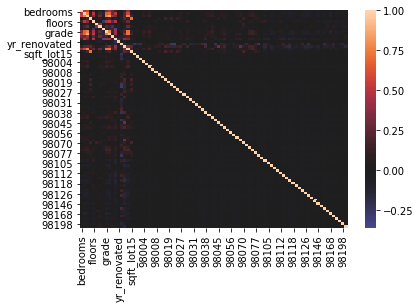

In [148]:
sns.heatmap(df_m.corr(), center=0);

Wow, that's alot of variables. Let's simplify by just looking without the binarized `zipcode`s for now.

In [149]:
df_m_small = df_m.iloc[:,0:18]

In [150]:
df_m_small.columns

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'date_formatted'],
      dtype='object')

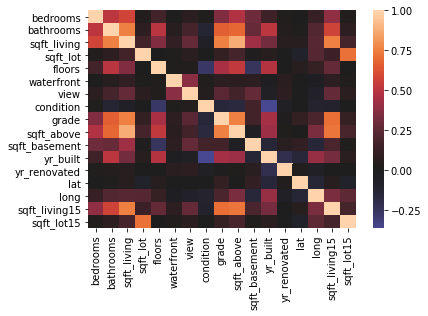

In [151]:
#Observe smaller dataset
sns.heatmap(df_m_small.corr(), center=0);

Let's also use the rule of thumb of correlations > .75 (absolute value)

Based on inspection of these results, if any of the variables are to be removed, we would remove `sqft_living` since it is highly correlated with a number of other variables, such as `bathrooms`, `grade`, `sqft_above` and `sqft_living15`.

In [153]:
# Create candidate dataframe
df_predictors = df_m.drop(['sqft_living'], axis=1)
df_predictors.columns

Index(['bedrooms', 'bathrooms', 'sqft_lot', 'floors', 'waterfront', 'view',
       'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built',
       'yr_renovated', 'lat', 'long', 'sqft_living15', 'sqft_lot15',
       'date_formatted', '98001', '98002', '98003', '98004', '98005', '98006',
       '98007', '98008', '98010', '98011', '98014', '98019', '98022', '98023',
       '98024', '98027', '98028', '98029', '98030', '98031', '98032', '98033',
       '98034', '98038', '98039', '98040', '98042', '98045', '98052', '98053',
       '98055', '98056', '98058', '98059', '98065', '98070', '98072', '98074',
       '98075', '98077', '98092', '98102', '98103', '98105', '98106', '98108',
       '98109', '98112', '98115', '98116', '98117', '98118', '98119', '98122',
       '98125', '98126', '98133', '98136', '98144', '98146', '98148', '98155',
       '98166', '98168', '98177', '98178', '98188', '98198', '98199'],
      dtype='object')

----

# Feature Scaling and Normalization

Next, we will go through the variables and determine if they need further scaling or normalization.

In [154]:
# Here's Werlindo's columns
w_cols = [col for col in df_predictors.columns][0:8]
w_cols

['bedrooms',
 'bathrooms',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade']

#### 1. `bedrooms`

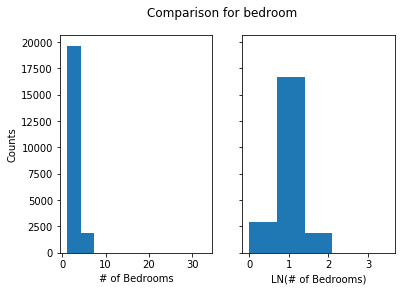

In [155]:
fig, ax = plt.subplots(1,2,sharey=True)

# First plot - no transformation
ax[0].hist(df_predictors['bedrooms'])
ax[0].set_ylabel("Counts")
ax[0].set_xlabel("# of Bedrooms")

# Second plot - log transformation
ax[1].hist(df_predictors['bedrooms'].apply(np.log), bins = 5)
ax[1].set_xlabel("LN(# of Bedrooms)")

plt.suptitle("Comparison for bedroom")
plt.show()

In [156]:
df_predictors['bedrooms'].value_counts()

3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

Yes, let's take the log.

#### 2 . `bathrooms`

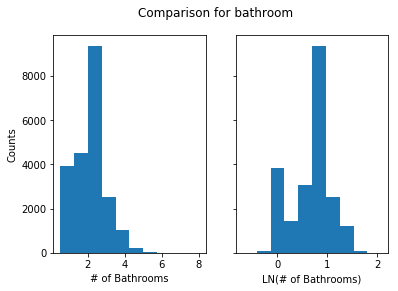

In [157]:
fig, ax = plt.subplots(1,2,sharey=True)

# First plot - no transformation
ax[0].hist(df_predictors['bathrooms'])
ax[0].set_ylabel("Counts")
ax[0].set_xlabel("# of Bathrooms")

# Second plot - log transformation
ax[1].hist(df_predictors['bathrooms'].apply(np.log))
ax[1].set_xlabel("LN(# of Bathrooms)")

plt.suptitle("Comparison for bathroom")
plt.show()

In [177]:
df_predictors['bathrooms'].value_counts()

2.50    5377
1.00    3851
1.75    3048
2.25    2047
2.00    1930
1.50    1445
2.75    1185
3.00     753
3.50     731
3.25     589
3.75     155
4.00     136
4.50     100
4.25      79
0.75      71
4.75      23
5.00      21
5.25      13
5.50      10
1.25       9
6.00       6
5.75       4
0.50       4
8.00       2
6.25       2
6.75       2
6.50       2
7.50       1
7.75       1
Name: bathrooms, dtype: int64

Yes, let's take the log.

#### 3. `sqft_lot`

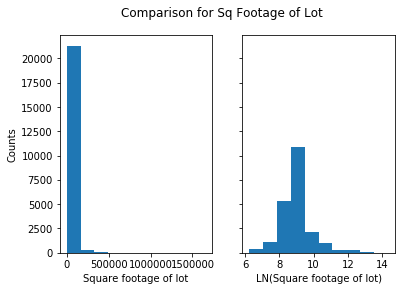

In [158]:
fig, ax = plt.subplots(1,2,sharey=True)

# First plot - no transformation
ax[0].hist(df_predictors['sqft_lot'])
ax[0].set_ylabel("Counts")
ax[0].set_xlabel("Square footage of lot")

# Second plot - log transformation
ax[1].hist(df_predictors['sqft_lot'].apply(np.log))
ax[1].set_xlabel("LN(Square footage of lot)")

plt.suptitle("Comparison for Sq Footage of Lot")
plt.show()

Yes, let's take the log.

#### 4. `floors`

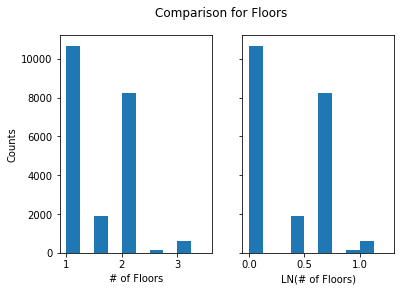

In [159]:
fig, ax = plt.subplots(1,2,sharey=True)

# First plot - no transformation
ax[0].hist(df_predictors['floors'])
ax[0].set_ylabel("Counts")
ax[0].set_xlabel("# of Floors")

# Second plot - log transformation
ax[1].hist(df_predictors['floors'].apply(np.log))
ax[1].set_xlabel("LN(# of Floors)")

plt.suptitle("Comparison for Floors")
plt.show()

In [180]:
df_predictors['floors'].value_counts()

1.0    10673
2.0     8235
1.5     1910
3.0      611
2.5      161
3.5        7
Name: floors, dtype: int64

Anecdotally, it's rare for a house to have more than 2 to 3 floors. So log transforming didn't do much. Might consider maybe making it `categorical`?

#### 5. `waterfront`

We forgot that `waterfront` is essentially a binary/categorical variable. So we will need to binarize it.

#### 6. `view`

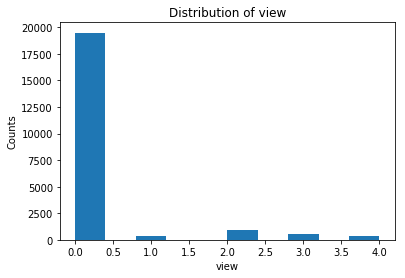

In [160]:
fig, ax = plt.subplots(1,1,sharey=True)

# First plot - no transformation
ax.hist(df_predictors['view'])
ax.set_ylabel("Counts")
ax.set_xlabel("view")
ax.set_title("Distribution of view")
plt.show()

This variable only has a few values. It might be better served to be treated as `categorical`.

#### 7. `condition`

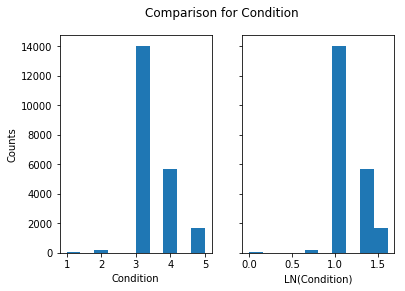

In [161]:
fig, ax = plt.subplots(1,2,sharey=True)

# First plot - no transformation
ax[0].hist(df_predictors['condition'])
ax[0].set_ylabel("Counts")
ax[0].set_xlabel("Condition")

# Second plot - log transformation
ax[1].hist(df_predictors['condition'].apply(np.log))
ax[1].set_xlabel("LN(Condition)")

plt.suptitle("Comparison for Condition")
plt.show()

The dimensionality of this variable is very low (only 5 values) and really only 3 values show up most of the time. Therefore we might be better served also binarizing/treating it as categorical? We might also consider just binning the first 3 groups since so few observations for `1` and `2`.

#### 8. `grade`

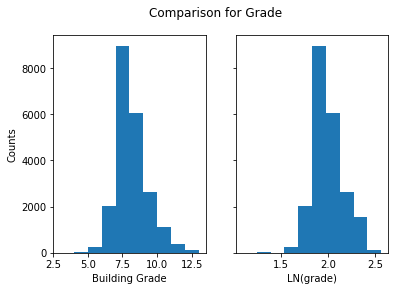

In [165]:
fig, ax = plt.subplots(1,2,sharey=True)

# First plot - no transformation
ax[0].hist(df_predictors['grade'])
ax[0].set_ylabel("Counts")
ax[0].set_xlabel("Building Grade")

# Second plot - log transformation
ax[1].hist(df_predictors['grade'].apply(np.log))
ax[1].set_xlabel("LN(grade)")

plt.suptitle("Comparison for Grade")
plt.show()

It already (at least to the eye test) seems pretty normal. So recommend leaving as is for now.

In [166]:
# Here's Werlindo's columns
w_cols = [col for col in df_predictors.columns][0:8]
w_cols

['bedrooms',
 'bathrooms',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade']

---

# More data cleaning

After we analyzed our existing variables for potential to transformation/normalize/standardize, we arrived at a set of variables to do so with, as well as a few more data cleaning tasks.

In [295]:
df3 = df_predictors.copy()
df3.columns

Index(['bedrooms', 'bathrooms', 'sqft_lot', 'floors', 'waterfront', 'view',
       'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built',
       'yr_renovated', 'lat', 'long', 'sqft_living15', 'sqft_lot15',
       'date_formatted', '98001', '98002', '98003', '98004', '98005', '98006',
       '98007', '98008', '98010', '98011', '98014', '98019', '98022', '98023',
       '98024', '98027', '98028', '98029', '98030', '98031', '98032', '98033',
       '98034', '98038', '98039', '98040', '98042', '98045', '98052', '98053',
       '98055', '98056', '98058', '98059', '98065', '98070', '98072', '98074',
       '98075', '98077', '98092', '98102', '98103', '98105', '98106', '98108',
       '98109', '98112', '98115', '98116', '98117', '98118', '98119', '98122',
       '98125', '98126', '98133', '98136', '98144', '98146', '98148', '98155',
       '98166', '98168', '98177', '98178', '98188', '98198', '98199'],
      dtype='object')

#### `sqft_above`

In [296]:
df3['sqft_above_log'] = df3['sqft_above'].apply(np.log)
df3.loc[:,['sqft_above','sqft_above_log']].head()

,sqft_above,sqft_above_log
0,1180,7.073270
1,2170,7.682482
2,770,6.646391
3,1050,6.956545
4,1680,7.426549


#### `sqft_living15`

In [297]:
df3['sqft_living15_log'] = df3['sqft_living15'].apply(np.log)
df3.loc[:,['sqft_living15','sqft_living15_log']].head()

,sqft_living15,sqft_living15_log
0,1340,7.200425
1,1690,7.432484
2,2720,7.908387
3,1360,7.215240
4,1800,7.495542


#### `sqft_lot15`

In [298]:
df3['sqft_lot15_log'] = df3['sqft_lot15'].apply(np.log)
df3.loc[:,['sqft_lot15','sqft_lot15_log']].head()

,sqft_lot15,sqft_lot15_log
0,5650,8.639411
1,7639,8.941022
2,8062,8.994917
3,5000,8.517193
4,7503,8.923058


#### `bedrooms`

In [299]:
df3['bedrooms_log'] = df3['bedrooms'].apply(np.log)
df3.loc[:,['bedrooms','bedrooms_log']].head()

,bedrooms,bedrooms_log
0,3,1.098612
1,3,1.098612
2,2,0.693147
3,4,1.386294
4,3,1.098612


#### `bathrooms`

In [300]:
df3['bathrooms_log'] = df3['bathrooms'].apply(np.log)
df3.loc[:,['bathrooms','bathrooms_log']].head()

,bathrooms,bathrooms_log
0,1.00,0.000000
1,2.25,0.810930
2,1.00,0.000000
3,3.00,1.098612
4,2.00,0.693147


#### `sqft_lot`

In [301]:
df3['sqft_lot_log'] = df3['sqft_lot'].apply(np.log)
df3.loc[:,['sqft_lot','sqft_lot_log']].head()

,sqft_lot,sqft_lot_log
0,5650,8.639411
1,7242,8.887653
2,10000,9.210340
3,5000,8.517193
4,8080,8.997147


#### `floors`

In [302]:
floors_binarized = pd.get_dummies(df3['floors'],prefix="floors")

In [303]:
floors_binarized.head()


,floors_1.0,floors_1.5,floors_2.0,floors_2.5,floors_3.0,floors_3.5
0,1,0,0,0,0,0
1,0,0,1,0,0,0
2,1,0,0,0,0,0
3,1,0,0,0,0,0
4,1,0,0,0,0,0


In [304]:
floors_binarized.shape

(21597, 6)

In [305]:
df3 = pd.concat([df3, floors_binarized], axis=1)

In [306]:
df3.head()

,bedrooms,bathrooms,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,...,sqft_lot15_log,bedrooms_log,bathrooms_log,sqft_lot_log,floors_1.0,floors_1.5,floors_2.0,floors_2.5,floors_3.0,floors_3.5
0,3,1.00,5650,1.0,0.0,0.0,3,7,1180,0,...,8.639411,1.098612,0.000000,8.639411,1,0,0,0,0,0
1,3,2.25,7242,2.0,0.0,0.0,3,7,2170,400,...,8.941022,1.098612,0.810930,8.887653,0,0,1,0,0,0
2,2,1.00,10000,1.0,0.0,0.0,3,6,770,0,...,8.994917,0.693147,0.000000,9.210340,1,0,0,0,0,0
3,4,3.00,5000,1.0,0.0,0.0,5,7,1050,910,...,8.517193,1.386294,1.098612,8.517193,1,0,0,0,0,0
4,3,2.00,8080,1.0,0.0,0.0,3,8,1680,0,...,8.923058,1.098612,0.693147,8.997147,1,0,0,0,0,0


In [307]:
# Drop one of the binarized columns
df3.drop(['floors_3.5'], axis=1, inplace=True)

#### `waterfront`

In [308]:
waterfront_binarized = pd.get_dummies(df3['waterfront'],prefix="wf")

In [309]:
waterfront_binarized.head()


,wf_0.0,wf_1.0
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [310]:
waterfront_binarized.shape

(21597, 2)

In [311]:
df3 = pd.concat([df3, waterfront_binarized], axis=1)

In [312]:
df3.head()

,bedrooms,bathrooms,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,...,bedrooms_log,bathrooms_log,sqft_lot_log,floors_1.0,floors_1.5,floors_2.0,floors_2.5,floors_3.0,wf_0.0,wf_1.0
0,3,1.00,5650,1.0,0.0,0.0,3,7,1180,0,...,1.098612,0.000000,8.639411,1,0,0,0,0,1,0
1,3,2.25,7242,2.0,0.0,0.0,3,7,2170,400,...,1.098612,0.810930,8.887653,0,0,1,0,0,1,0
2,2,1.00,10000,1.0,0.0,0.0,3,6,770,0,...,0.693147,0.000000,9.210340,1,0,0,0,0,1,0
3,4,3.00,5000,1.0,0.0,0.0,5,7,1050,910,...,1.386294,1.098612,8.517193,1,0,0,0,0,1,0
4,3,2.00,8080,1.0,0.0,0.0,3,8,1680,0,...,1.098612,0.693147,8.997147,1,0,0,0,0,1,0


In [313]:
# Drop one of the binarized columns
df3.drop(['wf_1.0'], axis=1, inplace=True)

#### `view`

In [314]:
view_binarized = pd.get_dummies(df3['view'],prefix="view")

In [315]:
view_binarized.head()


,view_0.0,view_1.0,view_2.0,view_3.0,view_4.0
0,1,0,0,0,0
1,1,0,0,0,0
2,1,0,0,0,0
3,1,0,0,0,0
4,1,0,0,0,0


In [316]:
view_binarized.shape

(21597, 5)

In [317]:
df3 = pd.concat([df3, view_binarized], axis=1)

In [318]:
df3.head()

,bedrooms,bathrooms,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,...,floors_1.5,floors_2.0,floors_2.5,floors_3.0,wf_0.0,view_0.0,view_1.0,view_2.0,view_3.0,view_4.0
0,3,1.00,5650,1.0,0.0,0.0,3,7,1180,0,...,0,0,0,0,1,1,0,0,0,0
1,3,2.25,7242,2.0,0.0,0.0,3,7,2170,400,...,0,1,0,0,1,1,0,0,0,0
2,2,1.00,10000,1.0,0.0,0.0,3,6,770,0,...,0,0,0,0,1,1,0,0,0,0
3,4,3.00,5000,1.0,0.0,0.0,5,7,1050,910,...,0,0,0,0,1,1,0,0,0,0
4,3,2.00,8080,1.0,0.0,0.0,3,8,1680,0,...,0,0,0,0,1,1,0,0,0,0


In [319]:
# Drop one of the binarized columns
df3.drop(['view_4.0'], axis=1, inplace=True)

#### `condition`

In [320]:
condition_binarized = pd.get_dummies(df3['condition'],prefix="cond")

In [321]:
condition_binarized.head()


,cond_1,cond_2,cond_3,cond_4,cond_5
0,0,0,1,0,0
1,0,0,1,0,0
2,0,0,1,0,0
3,0,0,0,0,1
4,0,0,1,0,0


In [322]:
condition_binarized.shape

(21597, 5)

In [323]:
df3 = pd.concat([df3, condition_binarized], axis=1)

In [324]:
df3.head()

,bedrooms,bathrooms,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,...,wf_0.0,view_0.0,view_1.0,view_2.0,view_3.0,cond_1,cond_2,cond_3,cond_4,cond_5
0,3,1.00,5650,1.0,0.0,0.0,3,7,1180,0,...,1,1,0,0,0,0,0,1,0,0
1,3,2.25,7242,2.0,0.0,0.0,3,7,2170,400,...,1,1,0,0,0,0,0,1,0,0
2,2,1.00,10000,1.0,0.0,0.0,3,6,770,0,...,1,1,0,0,0,0,0,1,0,0
3,4,3.00,5000,1.0,0.0,0.0,5,7,1050,910,...,1,1,0,0,0,0,0,0,0,1
4,3,2.00,8080,1.0,0.0,0.0,3,8,1680,0,...,1,1,0,0,0,0,0,1,0,0


In [325]:
# Drop one of the binarized columns
df3.drop(['cond_5'], axis=1, inplace=True)

The following we concluded to not transform:  
- `sqft_basement`
- `yr_built`
- `yr_renovated`
- `lat`
- `long`
- `grade`

We have alot of variables!

In [326]:
# Show our variables to date
df3.columns

Index(['bedrooms', 'bathrooms', 'sqft_lot', 'floors', 'waterfront', 'view',
       'condition', 'grade', 'sqft_above', 'sqft_basement',
       ...
       'floors_3.0', 'wf_0.0', 'view_0.0', 'view_1.0', 'view_2.0', 'view_3.0',
       'cond_1', 'cond_2', 'cond_3', 'cond_4'],
      dtype='object', length=106)

Since we did a few more transformations, we will do another instance of multicollinearity analysis.

#### Multicollinearity - Take 2

In [327]:
df3.drop(['waterfront','view','condition','floors'], axis=1, inplace=True)

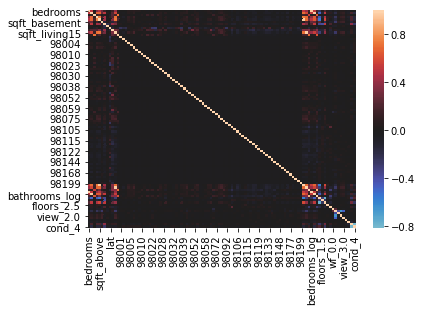

In [328]:
sns.heatmap(df3.corr(), center=0);

This heatmap is hard to interpret. It appears that zipcodes aren't outliers with respect to correlation, so we will reduce the columns to exclude them.

In [329]:
columns = [col for col in df3.columns]
columns

['bedrooms',
 'bathrooms',
 'sqft_lot',
 'grade',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15',
 'date_formatted',
 '98001',
 '98002',
 '98003',
 '98004',
 '98005',
 '98006',
 '98007',
 '98008',
 '98010',
 '98011',
 '98014',
 '98019',
 '98022',
 '98023',
 '98024',
 '98027',
 '98028',
 '98029',
 '98030',
 '98031',
 '98032',
 '98033',
 '98034',
 '98038',
 '98039',
 '98040',
 '98042',
 '98045',
 '98052',
 '98053',
 '98055',
 '98056',
 '98058',
 '98059',
 '98065',
 '98070',
 '98072',
 '98074',
 '98075',
 '98077',
 '98092',
 '98102',
 '98103',
 '98105',
 '98106',
 '98108',
 '98109',
 '98112',
 '98115',
 '98116',
 '98117',
 '98118',
 '98119',
 '98122',
 '98125',
 '98126',
 '98133',
 '98136',
 '98144',
 '98146',
 '98148',
 '98155',
 '98166',
 '98168',
 '98177',
 '98178',
 '98188',
 '98198',
 '98199',
 'sqft_above_log',
 'sqft_living15_log',
 'sqft_lot15_log',
 'bedrooms_log',
 'bathrooms_log',
 'sqft_lot_log',
 'floors_1.0',
 

In [330]:
columns_keep = []
for col in columns:
    if not(col.startswith('98')):
        columns_keep.append(col)
columns_keep

['bedrooms',
 'bathrooms',
 'sqft_lot',
 'grade',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15',
 'date_formatted',
 'sqft_above_log',
 'sqft_living15_log',
 'sqft_lot15_log',
 'bedrooms_log',
 'bathrooms_log',
 'sqft_lot_log',
 'floors_1.0',
 'floors_1.5',
 'floors_2.0',
 'floors_2.5',
 'floors_3.0',
 'wf_0.0',
 'view_0.0',
 'view_1.0',
 'view_2.0',
 'view_3.0',
 'cond_1',
 'cond_2',
 'cond_3',
 'cond_4']

We forgot to drop the variables we binarized, we will do that now:

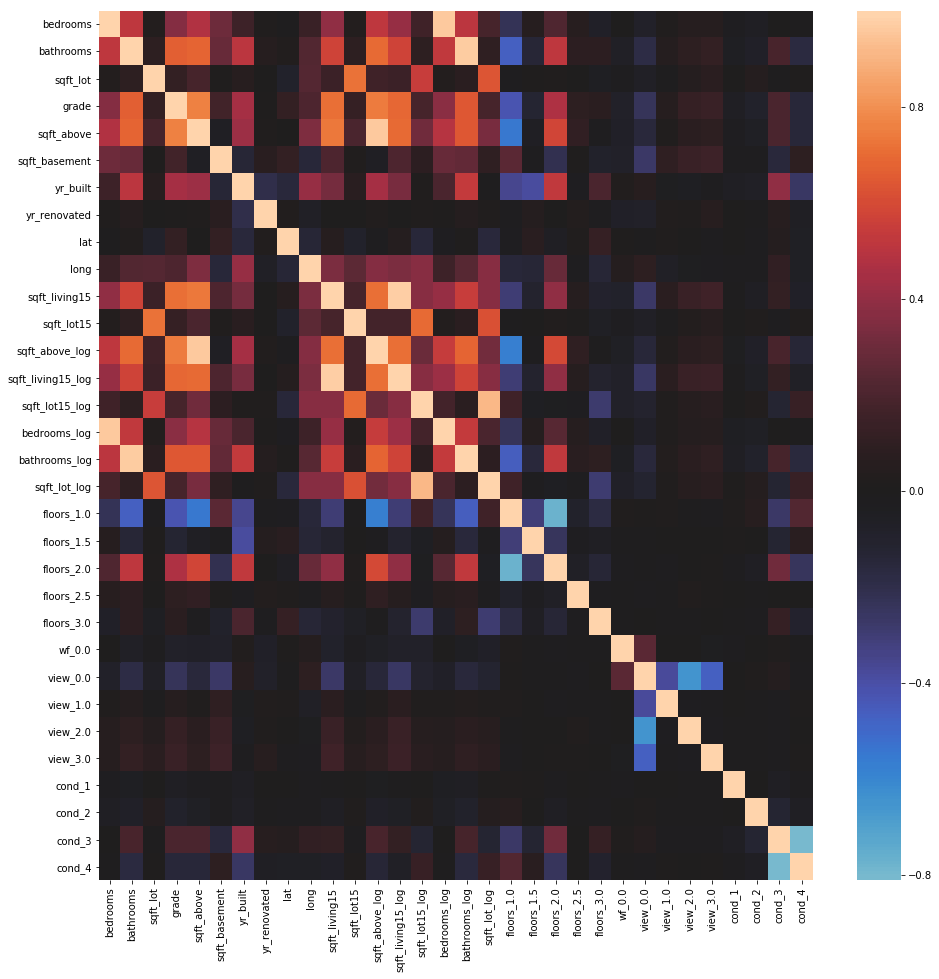

In [331]:
fig, ax = plt.subplots(figsize=(16,16))
sns.heatmap(df3.loc[:,columns_keep].corr(), center=0);

---

In [332]:
abs(df3.corr()) > 0.75

,bedrooms,bathrooms,sqft_lot,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,...,floors_3.0,wf_0.0,view_0.0,view_1.0,view_2.0,view_3.0,cond_1,cond_2,cond_3,cond_4
bedrooms,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
bathrooms,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
sqft_lot,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
grade,False,False,False,True,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
sqft_above,False,False,False,True,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
sqft_basement,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
yr_built,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
yr_renovated,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
lat,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
long,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False


### Target Variable: Should we log transform `Price`?

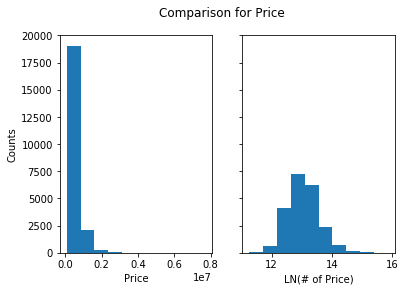

In [333]:
fig, ax = plt.subplots(1,2,sharey=True)

# First plot - no transformation
ax[0].hist(df['price'])
ax[0].set_ylabel("Counts")
ax[0].set_xlabel("Price")

# Second plot - log transformation
ax[1].hist(df['price'].apply(np.log))
ax[1].set_xlabel("LN(# of Price)")

plt.suptitle("Comparison for Price")
plt.show()

It defintely looks more normal, so we will consider log transforming `Price` as one of our iterations.

## Digression: 
We want to save my results, so for now I will use a list of dictionaries

In [501]:
#I want to save results of all my modeling 

# Create a dictionary to hold a single model's results
def store_results_to_dict(model_name, model_desc, r2, r2_adj,cv_20_mean=np.nan,cv_20_std=np.nan):
    curr_dict = {'model_name':model_name
                 ,'model_desc':model_desc
                 ,'r2':r2
                 ,'r2_adj':r2_adj
                 ,'cv_20_mean':cv_20_mean
                 ,'cv_20_std':cv_20_std
                }
    return curr_dict

# Want to keep list of all result dictionaries
results = []

# Model 1 - All Candidate Variables
### `Price` untransformed

We are going to start modeling to learn more above our variables! For this first run we are going to use ALL our variables.

In [502]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 22 columns):
id                21597 non-null int64
date              21597 non-null object
price             21597 non-null float64
bedrooms          21597 non-null int64
bathrooms         21597 non-null float64
sqft_living       21597 non-null int64
sqft_lot          21597 non-null int64
floors            21597 non-null float64
waterfront        21597 non-null float64
view              21597 non-null float64
condition         21597 non-null int64
grade             21597 non-null int64
sqft_above        21597 non-null int64
sqft_basement     21597 non-null int64
yr_built          21597 non-null int64
yr_renovated      21597 non-null float64
zipcode           21597 non-null object
lat               21597 non-null float64
long              21597 non-null float64
sqft_living15     21597 non-null int64
sqft_lot15        21597 non-null int64
date_formatted    21597 non-null datetime64[ns]
dtypes

In [503]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Columns: 101 entries, bedrooms to cond_4
dtypes: float64(10), int64(8), uint8(83)
memory usage: 4.7 MB


In [504]:
# Before we proceeed, let's remove `date_formatted`
df3 = df3.drop(['date_formatted'], axis=1)

KeyError: "['date_formatted'] not found in axis"

In [507]:
# Set up predictors
predictors = sm.add_constant(df3)

# Model SM LR model
model_1 = sm.OLS(df['price'], predictors).fit()

# View Results
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     997.2
Date:                Tue, 16 Apr 2019   Prob (F-statistic):               0.00
Time:                        16:49:09   Log-Likelihood:            -2.8862e+05
No. Observations:               21597   AIC:                         5.775e+05
Df Residuals:                   21495   BIC:                         5.783e+05
Df Model:                         101                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             -3.767e+07   5.98e+06     -6.295      0.000   -4.94e+07   -2.59e+07
bedrooms          -4.072e+04   4227.020     -9.634      0.000    -4.9e+04   -3.24e+04
bathrooms           1.61e+05   7053.380     22.829      0.000    1.47e+05    1.75e+05
sqft_lot              0.0015      0.045      0.035      0.972      -0.086       0.089
grade              6.035e+04   1773.987     34.019      0.000    5.69e+04    6.38e+04
sqft_above          267.5350      6.372     41.986      0.000     255.045     280.025
sqft_basement       116.4550      3.448     33.778      0.000     109.697     123.213
yr_built           -236.7558     69.017     -3.430      0.001    -372.034    -101.478
yr_renovated         25.8591      3.099      8.344      0.000      19.785      31.934
lat                2.363e+05    6.1e+04      3.874      0.000    1.17e+05    3.56e+05
long              -2.444e+05   4.43e+04     -5.522      0.000   -3.31e+05   -1.58e+05
sqft_living15        97.1383      8.903     10.911      0.000      79.688     114.588
sqft_lot15           -0.3174      0.075     -4.242      0.000      -0.464      -0.171
98001             -2.449e+05   2.57e+04     -9.538      0.000   -2.95e+05   -1.95e+05
98002             -2.088e+05    2.7e+04     -7.724      0.000   -2.62e+05   -1.56e+05
98003             -2.643e+05   2.55e+04    -10.344      0.000   -3.14e+05   -2.14e+05
98004              4.677e+05   1.55e+04     30.178      0.000    4.37e+05    4.98e+05
98005               1.63e+04   1.83e+04      0.889      0.374   -1.97e+04    5.23e+04
98006             -1.883e+04    1.7e+04     -1.109      0.267   -5.21e+04    1.44e+04
98007             -2.795e+04   1.95e+04     -1.432      0.152   -6.62e+04    1.03e+04
98008             -1.397e+04   1.79e+04     -0.781      0.435    -4.9e+04    2.11e+04
98010             -1.342e+05   3.13e+04     -4.284      0.000   -1.96e+05   -7.28e+04
98011              -1.96e+05   1.77e+04    -11.062      0.000   -2.31e+05   -1.61e+05
98014             -1.362e+05   2.86e+04     -4.760      0.000   -1.92e+05   -8.01e+04
98019             -1.701e+05   2.43e+04     -6.998      0.000   -2.18e+05   -1.22e+05
98022             -1.604e+05   3.45e+04     -4.642      0.000   -2.28e+05   -9.27e+04
98023             -2.988e+05   2.52e+04    -11.854      0.000   -3.48e+05   -2.49e+05
98024             -8.224e+04   2.91e+04     -2.830      0.005   -1.39e+05   -2.53e+04
98027              -7.44e+04   2.08e+04     -3.583      0.000   -1.15e+05   -3.37e+04
98028             -2.133e+05   1.58e+04    -13.530      0.000   -2.44e+05   -1.82e+05
98029             -1.532e+04   2.16e+04     -0.708      0.479   -5.77e+04    2.71e+04
98030              -2.23e+05    2.4e+04     -9.292      0.000    -2.7e+05   -1.76e+05
98031             -2.253e+05   2.23e+04    -10.084      0.000   -2.69e+05

From $R^2$ perspective this model appears to very good. There appears to be a number of insignificant variables, which is not surprising since we threw in **all** of our candidate variables.

## Cross Validation - Round 1

First, some setup for required libraries.

In [508]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

In [509]:
np.random.seed(1111)

In [510]:
linreg = LinearRegression()
X = df3
y = df['price']

In [511]:
cv_20_res_mean = np.mean(cross_val_score(linreg, X, y, cv=20, scoring="neg_mean_squared_error"))
cv_20_res_std = np.std(cross_val_score(linreg, X, y, cv=20, scoring="neg_mean_squared_error"))

In [512]:
print("Accuracy: {:,.2f} (+/- {:,.2f})".format(cv_20_res_mean, cv_20_res_std * 2))

Accuracy: -24,295,855,043.91 (+/- 11,343,184,297.84)


In [514]:
results.append(store_results_to_dict('model_1','All preliminary variables included'
                                     ,model_1.rsquared, model_1.rsquared_adj
                                    ,cv_20_res_mean, cv_20_res_std))               

In [515]:
results

[{'model_name': 'model_1',
  'model_desc': 'All preliminary variables included',
  'r2': 0.8241107391458431,
  'r2_adj': 0.8232842764639976,
  'cv_20_mean': -24295855043.908768,
  'cv_20_std': 5671592148.921876}]

# Model 2 - Removed insignificant variables from M.1
### `Price` untransformed


For this version we will drop all the columns that had `p-value > .05`.

In [516]:
# So one brute-force way to pare down this model is throw out variables that have high p-values.
drop_candidates = model_1.pvalues[model_1.pvalues > .05].reset_index()['index'].tolist()
drop_candidates

['sqft_lot',
 '98005',
 '98006',
 '98007',
 '98008',
 '98029',
 '98103',
 '98115',
 '98144',
 'sqft_lot15_log',
 'floors_1.0',
 'floors_1.5',
 'floors_2.0',
 'floors_2.5',
 'floors_3.0']

In [389]:
df3b = df3.copy()

In [401]:
df3b.drop(drop_candidates,axis=1,inplace=True)

In [402]:
df3b.columns

Index(['bedrooms', 'bathrooms', 'grade', 'sqft_above', 'sqft_basement',
       'yr_built', 'yr_renovated', 'lat', 'long', 'sqft_living15',
       'sqft_lot15', '98001', '98002', '98003', '98004', '98010', '98011',
       '98014', '98019', '98022', '98023', '98024', '98027', '98028', '98030',
       '98031', '98032', '98033', '98034', '98038', '98039', '98040', '98042',
       '98045', '98052', '98053', '98055', '98056', '98058', '98059', '98065',
       '98070', '98072', '98074', '98075', '98077', '98092', '98102', '98105',
       '98106', '98108', '98109', '98112', '98116', '98117', '98118', '98119',
       '98122', '98125', '98126', '98133', '98136', '98146', '98148', '98155',
       '98166', '98168', '98177', '98178', '98188', '98198', '98199',
       'sqft_above_log', 'sqft_living15_log', 'bedrooms_log', 'bathrooms_log',
       'sqft_lot_log', 'wf_0.0', 'view_0.0', 'view_1.0', 'view_2.0',
       'view_3.0', 'cond_1', 'cond_2', 'cond_3', 'cond_4'],
      dtype='object')

In [441]:
# Set up predictors
predictors = sm.add_constant(df3b)

# Model SM LR model
model_2 = sm.OLS(df['price'], predictors).fit()

# View Results
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     1164.
Date:                Tue, 16 Apr 2019   Prob (F-statistic):               0.00
Time:                        16:08:26   Log-Likelihood:            -2.8869e+05
No. Observations:               21597   AIC:                         5.775e+05
Df Residuals:                   21510   BIC:                         5.782e+05
Df Model:                          86                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               -4.1e+07   2.89e+06    -14.209      0.000   -4.67e+07   -3.53e+07
bedrooms          -4.095e+04   4230.309     -9.681      0.000   -4.92e+04   -3.27e+04
bathrooms          1.604e+05   7054.177     22.733      0.000    1.47e+05    1.74e+05
grade              6.046e+04   1774.416     34.076      0.000     5.7e+04    6.39e+04
sqft_above          268.0737      6.317     42.435      0.000     255.691     280.456
sqft_basement       121.2136      3.323     36.473      0.000     114.700     127.728
yr_built           -432.4945     62.963     -6.869      0.000    -555.906    -309.083
yr_renovated         24.1147      3.093      7.797      0.000      18.052      30.177
lat                3.221e+05   4.81e+04      6.697      0.000    2.28e+05    4.16e+05
long              -2.404e+05   2.59e+04     -9.267      0.000   -2.91e+05    -1.9e+05
sqft_living15        93.5724      8.836     10.589      0.000      76.252     110.892
sqft_lot15           -0.3767      0.054     -7.022      0.000      -0.482      -0.272
98001             -2.059e+05   1.81e+04    -11.381      0.000   -2.41e+05    -1.7e+05
98002               -1.7e+05   1.89e+04     -8.994      0.000   -2.07e+05   -1.33e+05
98003             -2.254e+05   1.88e+04    -11.989      0.000   -2.62e+05   -1.89e+05
98004              4.784e+05   9281.584     51.540      0.000     4.6e+05    4.97e+05
98010             -9.815e+04   1.99e+04     -4.923      0.000   -1.37e+05   -5.91e+04
98011             -1.963e+05   1.34e+04    -14.697      0.000   -2.22e+05    -1.7e+05
98014             -1.309e+05   1.81e+04     -7.237      0.000   -1.66e+05   -9.54e+04
98019             -1.717e+05   1.58e+04    -10.841      0.000   -2.03e+05   -1.41e+05
98022             -1.121e+05   2.06e+04     -5.435      0.000   -1.53e+05   -7.17e+04
98023             -2.587e+05   1.89e+04    -13.696      0.000   -2.96e+05   -2.22e+05
98024             -6.888e+04   1.91e+04     -3.605      0.000   -1.06e+05   -3.14e+04
98027             -5.403e+04   9375.425     -5.763      0.000   -7.24e+04   -3.57e+04
98028             -2.139e+05   1.15e+04    -18.556      0.000   -2.36e+05   -1.91e+05
98030             -1.891e+05   1.56e+04    -12.106      0.000    -2.2e+05   -1.58e+05
98031             -1.953e+05   1.42e+04    -13.785      0.000   -2.23e+05   -1.68e+05
98032             -2.328e+05   1.91e+04    -12.165      0.000    -2.7e+05   -1.95e+05
98033              6.178e+04   8697.262      7.103      0.000    4.47e+04    7.88e+04
98034             -1.155e+05   8819.115    -13.091      0.000   -1.33e+05   -9.82e+04
98038             -1.248e+05   1.27e+04     -9.847      0.000    -1.5e+05      -1e+05
98039              9.549e+05   2.23e+04     42.759      0.000    9.11e+05    9.99e+05
98040               2.26e+05   1.03e+04     21.962      0.000    2.06e+05

So, the model is very slightly worse from the perspective or $R^2_{adj}$ performance (.822 vs .823 for the prior model). But it is a simpler model in that it has 15 less variables!

## Cross Validation - Round 2

In [517]:
linreg = LinearRegression()
X = df3b
y = df['price']

In [518]:
cv_20_res_mean = np.mean(cross_val_score(linreg, X, y, cv=20, scoring="neg_mean_squared_error"))
cv_20_res_std = np.std(cross_val_score(linreg, X, y, cv=20, scoring="neg_mean_squared_error"))

In [519]:
print("Accuracy: {:,.2f} (+/- {:,.2f})".format(cv_20_res_mean, cv_20_res_std * 2))

Accuracy: -24,367,353,307.19 (+/- 11,474,639,243.18)


In [520]:
results.append(store_results_to_dict('model_2','Model 1 with >.05 p-value variables removed'
                                     ,model_2.rsquared, model_2.rsquared_adj
                                    ,cv_20_res_mean, cv_20_res_std))               

In [521]:
results

[{'model_name': 'model_1',
  'model_desc': 'All preliminary variables included',
  'r2': 0.8241107391458431,
  'r2_adj': 0.8232842764639976,
  'cv_20_mean': -24295855043.908768,
  'cv_20_std': 5671592148.921876},
 {'model_name': 'model_2',
  'model_desc': 'Model 1 with >.05 p-value variables removed',
  'r2': 0.8230952167011033,
  'r2_adj': 0.8223879265400756,
  'cv_20_mean': -24367353307.185387,
  'cv_20_std': 5737319621.591205}]

# Model 3 - Log transformed `Price`

### Combine Model 2 with log-transformed `Price`

In [522]:
# Set up predictors
predictors = sm.add_constant(df3b)

# Model SM LR model
model_3 = sm.OLS(np.log(df['price']), predictors).fit()

# View Results
model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.884
Model:                            OLS   Adj. R-squared:                  0.883
Method:                 Least Squares   F-statistic:                     1901.
Date:                Tue, 16 Apr 2019   Prob (F-statistic):               0.00
Time:                        16:57:20   Log-Likelihood:                 6443.0
No. Observations:               21597   AIC:                        -1.271e+04
Df Residuals:                   21510   BIC:                        -1.202e+04
Df Model:                          86                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               -91.8656      3.353    -27.396      0.000     -98.438     -85.293
bedrooms             -0.0213      0.005     -4.336      0.000      -0.031      -0.012
bathrooms             0.0020      0.008      0.239      0.811      -0.014       0.018
grade                 0.0879      0.002     42.621      0.000       0.084       0.092
sqft_above            0.0001   7.34e-06     14.490      0.000     9.2e-05       0.000
sqft_basement         0.0001   3.86e-06     33.909      0.000       0.000       0.000
yr_built             -0.0003   7.32e-05     -4.554      0.000      -0.000      -0.000
yr_renovated       3.243e-05   3.59e-06      9.022      0.000    2.54e-05    3.95e-05
lat                   0.8085      0.056     14.463      0.000       0.699       0.918
long                 -0.5207      0.030    -17.273      0.000      -0.580      -0.462
sqft_living15     -3.074e-05   1.03e-05     -2.993      0.003   -5.09e-05   -1.06e-05
sqft_lot15        -1.228e-07   6.23e-08     -1.970      0.049   -2.45e-07   -6.04e-10
98001                -0.5199      0.021    -24.726      0.000      -0.561      -0.479
98002                -0.4883      0.022    -22.226      0.000      -0.531      -0.445
98003                -0.5271      0.022    -24.124      0.000      -0.570      -0.484
98004                 0.3841      0.011     35.610      0.000       0.363       0.405
98010                -0.1697      0.023     -7.324      0.000      -0.215      -0.124
98011                -0.3967      0.016    -25.567      0.000      -0.427      -0.366
98014                -0.3004      0.021    -14.292      0.000      -0.342      -0.259
98019                -0.3892      0.018    -21.149      0.000      -0.425      -0.353
98022                -0.2555      0.024    -10.657      0.000      -0.303      -0.209
98023                -0.5883      0.022    -26.805      0.000      -0.631      -0.545
98024                -0.1186      0.022     -5.341      0.000      -0.162      -0.075
98027                -0.0620      0.011     -5.692      0.000      -0.083      -0.041
98028                -0.4512      0.013    -33.685      0.000      -0.477      -0.425
98030                -0.4729      0.018    -26.055      0.000      -0.508      -0.437
98031                -0.4800      0.016    -29.153      0.000      -0.512      -0.448
98032                -0.5923      0.022    -26.627      0.000      -0.636      -0.549
98033                 0.0131      0.010      1.293      0.196      -0.007       0.033
98034                -0.2700      0.010    -26.349      0.000      -0.290      -0.250
98038                -0.2785      0.015    -18.911      0.000      -0.307      -0.250
98039                 0.5149      0.026     19.839      0.000       0.464       0.566
98040                 0.1736      0.012     14.515      0.000       0.150

$R^2$ is noticeably higher at `.884` vs `.823` in **Model 2**!

## Cross Validation - Round 3

In [526]:
linreg = LinearRegression()
X = df3b
y = np.log(df['price'])

In [527]:
cv_20_res_mean = np.mean(cross_val_score(linreg, X, y, cv=20, scoring="neg_mean_squared_error"))
cv_20_res_std = np.std(cross_val_score(linreg, X, y, cv=20, scoring="neg_mean_squared_error"))

In [528]:
print("Accuracy: {:,.4f} (+/- {:,.4f})".format(cv_20_res_mean, cv_20_res_std * 2))

Accuracy: -0.0327 (+/- 0.0059)


In [529]:
results.append(store_results_to_dict('model_3'
                                     ,'Model 2 with log-transformed Price'
                                     ,model_3.rsquared, model_3.rsquared_adj
                                    ,cv_20_res_mean, cv_20_res_std))               

In [530]:
results

[{'model_name': 'model_1',
  'model_desc': 'All preliminary variables included',
  'r2': 0.8241107391458431,
  'r2_adj': 0.8232842764639976,
  'cv_20_mean': -24295855043.908768,
  'cv_20_std': 5671592148.921876},
 {'model_name': 'model_2',
  'model_desc': 'Model 1 with >.05 p-value variables removed',
  'r2': 0.8230952167011033,
  'r2_adj': 0.8223879265400756,
  'cv_20_mean': -24367353307.185387,
  'cv_20_std': 5737319621.591205},
 {'model_name': 'model_3',
  'model_desc': 'Model 2 with log-transformed Price',
  'r2': 0.8837124087305842,
  'r2_adj': 0.8832474746139329,
  'cv_20_mean': -0.03267151368409461,
  'cv_20_std': 0.002941594258858663}]

Woah. Because we transformed our target variable, the scale of our mean squared error also changed. So it's going to be hard to compare `Model 3` to `Models 1 and 2`. But we should be able still compare version's of the model that use the same version of the target variable (non-transformed vs log-transformed).

# Model 4 - All variables, log-transformed `price`

For completeness, we will also document a model with all variables, but with `price` log-transformed.

In [531]:
# Set up predictors
predictors = sm.add_constant(df3)

# Model SM LR model
model_4 = sm.OLS(np.log(df['price']), predictors).fit()

# View Results
model_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.885
Model:                            OLS   Adj. R-squared:                  0.884
Method:                 Least Squares   F-statistic:                     1635.
Date:                Tue, 16 Apr 2019   Prob (F-statistic):               0.00
Time:                        17:16:01   Log-Likelihood:                 6548.1
No. Observations:               21597   AIC:                        -1.289e+04
Df Residuals:                   21495   BIC:                        -1.208e+04
Df Model:                         101                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               -67.5621      6.940     -9.735      0.000     -81.165     -53.959
bedrooms             -0.0212      0.005     -4.324      0.000      -0.031      -0.012
bathrooms             0.0005      0.008      0.055      0.956      -0.016       0.016
sqft_lot           1.942e-07   5.17e-08      3.758      0.000    9.29e-08    2.95e-07
grade                 0.0881      0.002     42.829      0.000       0.084       0.092
sqft_above            0.0001   7.39e-06     14.229      0.000    9.07e-05       0.000
sqft_basement         0.0001      4e-06     31.937      0.000       0.000       0.000
yr_built          -7.946e-05      8e-05     -0.993      0.321      -0.000    7.74e-05
yr_renovated       3.523e-05   3.59e-06      9.802      0.000    2.82e-05    4.23e-05
lat                   0.5348      0.071      7.558      0.000       0.396       0.673
long                 -0.4255      0.051     -8.290      0.000      -0.526      -0.325
sqft_living15     -2.234e-05   1.03e-05     -2.164      0.030   -4.26e-05   -2.11e-06
sqft_lot15        -1.147e-07   8.68e-08     -1.322      0.186   -2.85e-07    5.54e-08
98001                -0.6676      0.030    -22.416      0.000      -0.726      -0.609
98002                -0.6432      0.031    -20.512      0.000      -0.705      -0.582
98003                -0.6695      0.030    -22.594      0.000      -0.728      -0.611
98004                 0.3166      0.018     17.612      0.000       0.281       0.352
98005                -0.0562      0.021     -2.642      0.008      -0.098      -0.015
98006                -0.1066      0.020     -5.414      0.000      -0.145      -0.068
98007                -0.1171      0.023     -5.174      0.000      -0.162      -0.073
98008                -0.1063      0.021     -5.123      0.000      -0.147      -0.066
98010                -0.3342      0.036     -9.197      0.000      -0.405      -0.263
98011                -0.4299      0.021    -20.917      0.000      -0.470      -0.390
98014                -0.3888      0.033    -11.711      0.000      -0.454      -0.324
98019                -0.4497      0.028    -15.952      0.000      -0.505      -0.394
98022                -0.4605      0.040    -11.493      0.000      -0.539      -0.382
98023                -0.7284      0.029    -24.919      0.000      -0.786      -0.671
98024                -0.2300      0.034     -6.826      0.000      -0.296      -0.164
98027                -0.1741      0.024     -7.229      0.000      -0.221      -0.127
98028                -0.4786      0.018    -26.173      0.000      -0.514      -0.443
98029                -0.0838      0.025     -3.340      0.001      -0.133      -0.035
98030                -0.6141      0.028    -22.065      0.000      -0.669      -0.560
98031                -0.6114      0.026    -23.593      0.000      -0.662

It's resulting $R^2$ is similar to Model 3's. And its relationship to Model 3 is similar to that of Model 1's to Model 2's, i.e. slightly favorable.

## Cross Validation - Round 4

In [533]:
linreg = LinearRegression()
X = df3
y = np.log(df['price'])

In [534]:
cv_20_res_mean = np.mean(cross_val_score(linreg, X, y, cv=20, scoring="neg_mean_squared_error"))
cv_20_res_std = np.std(cross_val_score(linreg, X, y, cv=20, scoring="neg_mean_squared_error"))

In [535]:
print("Accuracy: {:,.2f} (+/- {:,.2f})".format(cv_20_res_mean, cv_20_res_std * 2))

Accuracy: -0.03 (+/- 0.01)


In [536]:
results.append(store_results_to_dict('model_4','All preliminary variables included, log-transformed price'
                                     ,model_4.rsquared
                                     ,model_4.rsquared_adj
                                    ,cv_20_res_mean, cv_20_res_std))               

In [537]:
results

[{'model_name': 'model_1',
  'model_desc': 'All preliminary variables included',
  'r2': 0.8241107391458431,
  'r2_adj': 0.8232842764639976,
  'cv_20_mean': -24295855043.908768,
  'cv_20_std': 5671592148.921876},
 {'model_name': 'model_2',
  'model_desc': 'Model 1 with >.05 p-value variables removed',
  'r2': 0.8230952167011033,
  'r2_adj': 0.8223879265400756,
  'cv_20_mean': -24367353307.185387,
  'cv_20_std': 5737319621.591205},
 {'model_name': 'model_3',
  'model_desc': 'Model 2 with log-transformed Price',
  'r2': 0.8837124087305842,
  'r2_adj': 0.8832474746139329,
  'cv_20_mean': -0.03267151368409461,
  'cv_20_std': 0.002941594258858663},
 {'model_name': 'model_4',
  'model_desc': 'All preliminary variables included, log-transformed price',
  'r2': 0.8848382070032368,
  'r2_adj': 0.8842970885527751,
  'cv_20_mean': -0.032411185202738606,
  'cv_20_std': 0.003003846997069611}]

# Model 5 - Removed insignificant variables from M.4
### `Price` log-transformed


For this version we will drop all the columns that had `p-value > .05` in **Model 4**. 
To reiterate, Model 4 included all our original variables, but with the `price` log-transformed.

To put it yet another way, this model is to **Model 4** as **Model 2** is to **Model 1**.

In [544]:
# So one brute-force way to pare down this model is throw out variables that have high p-values.
drop_candidates = model_4.pvalues[model_4.pvalues > .05].reset_index()['index'].tolist()
drop_candidates

['bathrooms',
 'yr_built',
 'sqft_lot15',
 '98103',
 '98115',
 '98122',
 '98199',
 'floors_1.0',
 'floors_1.5',
 'floors_2.0',
 'floors_2.5',
 'floors_3.0']

In [545]:
df3_log = df3.copy()

In [546]:
df3_log.drop(drop_candidates,axis=1,inplace=True)

In [547]:
df3_log.columns

Index(['bedrooms', 'sqft_lot', 'grade', 'sqft_above', 'sqft_basement',
       'yr_renovated', 'lat', 'long', 'sqft_living15', '98001', '98002',
       '98003', '98004', '98005', '98006', '98007', '98008', '98010', '98011',
       '98014', '98019', '98022', '98023', '98024', '98027', '98028', '98029',
       '98030', '98031', '98032', '98033', '98034', '98038', '98039', '98040',
       '98042', '98045', '98052', '98053', '98055', '98056', '98058', '98059',
       '98065', '98070', '98072', '98074', '98075', '98077', '98092', '98102',
       '98105', '98106', '98108', '98109', '98112', '98116', '98117', '98118',
       '98119', '98125', '98126', '98133', '98136', '98144', '98146', '98148',
       '98155', '98166', '98168', '98177', '98178', '98188', '98198',
       'sqft_above_log', 'sqft_living15_log', 'sqft_lot15_log', 'bedrooms_log',
       'bathrooms_log', 'sqft_lot_log', 'wf_0.0', 'view_0.0', 'view_1.0',
       'view_2.0', 'view_3.0', 'cond_1', 'cond_2', 'cond_3', 'cond_4'],
      d

In [548]:
# Set up predictors
predictors = sm.add_constant(df3_log)

# Model SM LR model
model_5 = sm.OLS(df['price'], predictors).fit()

# View Results
model_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     1087.
Date:                Tue, 16 Apr 2019   Prob (F-statistic):               0.00
Time:                        17:38:40   Log-Likelihood:            -2.8898e+05
No. Observations:               21597   AIC:                         5.781e+05
Df Residuals:                   21507   BIC:                         5.789e+05
Df Model:                          89                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             -3.726e+07   5.52e+06     -6.754      0.000   -4.81e+07   -2.64e+07
bedrooms          -2.748e+04   4250.603     -6.466      0.000   -3.58e+04   -1.92e+04
sqft_lot             -0.1726      0.037     -4.715      0.000      -0.244      -0.101
grade              5.702e+04   1725.634     33.043      0.000    5.36e+04    6.04e+04
sqft_above          326.8521      5.883     55.559      0.000     315.321     338.383
sqft_basement       135.4176      3.322     40.760      0.000     128.906     141.930
yr_renovated         31.8790      3.009     10.596      0.000      25.982      37.776
lat                1.233e+05   5.65e+04      2.183      0.029    1.26e+04    2.34e+05
long              -2.884e+05   4.06e+04     -7.111      0.000   -3.68e+05   -2.09e+05
sqft_living15       108.5169      8.998     12.060      0.000      90.880     126.154
98001             -3.065e+05   2.21e+04    -13.855      0.000    -3.5e+05   -2.63e+05
98002             -2.608e+05   2.36e+04    -11.053      0.000   -3.07e+05   -2.15e+05
98003             -3.231e+05   2.22e+04    -14.582      0.000   -3.66e+05    -2.8e+05
98004              4.534e+05   1.14e+04     39.790      0.000    4.31e+05    4.76e+05
98005             -1165.1527   1.48e+04     -0.079      0.937   -3.02e+04    2.79e+04
98006             -4.405e+04   1.26e+04     -3.506      0.000   -6.87e+04   -1.94e+04
98007             -4.704e+04   1.61e+04     -2.924      0.003   -7.86e+04   -1.55e+04
98008             -3.126e+04   1.37e+04     -2.284      0.022   -5.81e+04   -4439.561
98010             -1.882e+05   2.77e+04     -6.783      0.000   -2.43e+05   -1.34e+05
98011             -2.051e+05   1.42e+04    -14.433      0.000   -2.33e+05   -1.77e+05
98014             -1.453e+05   2.45e+04     -5.923      0.000   -1.93e+05   -9.72e+04
98019             -1.765e+05   2.01e+04     -8.760      0.000   -2.16e+05   -1.37e+05
98022             -2.208e+05   3.04e+04     -7.253      0.000    -2.8e+05   -1.61e+05
98023             -3.631e+05   2.18e+04    -16.684      0.000   -4.06e+05    -3.2e+05
98024             -1.014e+05   2.55e+04     -3.972      0.000   -1.51e+05   -5.14e+04
98027             -9.822e+04   1.64e+04     -5.976      0.000    -1.3e+05    -6.6e+04
98028             -2.215e+05    1.2e+04    -18.417      0.000   -2.45e+05   -1.98e+05
98029              -3.21e+04   1.73e+04     -1.856      0.063    -6.6e+04    1803.538
98030             -2.735e+05   2.04e+04    -13.431      0.000   -3.13e+05   -2.34e+05
98031             -2.728e+05   1.87e+04    -14.615      0.000   -3.09e+05   -2.36e+05
98032             -3.161e+05    2.2e+04    -14.367      0.000   -3.59e+05   -2.73e+05
98033              4.629e+04   1.05e+04      4.421      0.000    2.58e+04    6.68e+04
98034             -1.268e+05   9953.455    -12.742      0.000   -1.46e+05

So this model is the worse so far. And we also see that certain variables are now insignificant, whereas they were not before. Maybe this is indication of uncaught multicollinearity?

## Cross Validation - Round 5

In [549]:
linreg = LinearRegression()
X = df3_log
y = np.log(df['price'])

In [550]:
cv_20_res_mean = np.mean(cross_val_score(linreg, X, y, cv=20, scoring="neg_mean_squared_error"))
cv_20_res_std = np.std(cross_val_score(linreg, X, y, cv=20, scoring="neg_mean_squared_error"))

In [551]:
print("Accuracy: {:,.2f} (+/- {:,.2f})".format(cv_20_res_mean, cv_20_res_std * 2))

Accuracy: -0.03 (+/- 0.01)


In [552]:
results.append(store_results_to_dict('model_5','Model 4 with >.05 p-value variables removed'
                                     ,model_5.rsquared, model_5.rsquared_adj
                                    ,cv_20_res_mean, cv_20_res_std))               

In [553]:
results

[{'model_name': 'model_1',
  'model_desc': 'All preliminary variables included',
  'r2': 0.8241107391458431,
  'r2_adj': 0.8232842764639976,
  'cv_20_mean': -24295855043.908768,
  'cv_20_std': 5671592148.921876},
 {'model_name': 'model_2',
  'model_desc': 'Model 1 with >.05 p-value variables removed',
  'r2': 0.8230952167011033,
  'r2_adj': 0.8223879265400756,
  'cv_20_mean': -24367353307.185387,
  'cv_20_std': 5737319621.591205},
 {'model_name': 'model_3',
  'model_desc': 'Model 2 with log-transformed Price',
  'r2': 0.8837124087305842,
  'r2_adj': 0.8832474746139329,
  'cv_20_mean': -0.03267151368409461,
  'cv_20_std': 0.002941594258858663},
 {'model_name': 'model_4',
  'model_desc': 'All preliminary variables included, log-transformed price',
  'r2': 0.8848382070032368,
  'r2_adj': 0.8842970885527751,
  'cv_20_mean': -0.032411185202738606,
  'cv_20_std': 0.003003846997069611},
 {'model_name': 'model_5',
  'model_desc': 'Model 4 with >.05 p-value variables removed',
  'r2': 0.8181414

# Model 6 - Add new feature: Distance to Flatiron School

We calculated straight-line distance to Flatiron School using the Haversine formula and the provided `lat` and `long`. The reasoning behind this is that Flatiron will act as a proxy for downtown Seattle. This is important because downtown Seattle is a hub for many workplace destinations (e.g. Amazon, Oracle, Macy's,etc.)

In [556]:
from haversine import haversine

# Flatiron's Lat/Long
flatiron_school = (47.6098, -122.336)

# Create copy of our primary dataframe
df_distance = df.copy()

# Initialize list to store calculated distances, 
# then loop through df and calculate distance using Haversine formula
distance_keep = []
for index, row in df_distance.iterrows():
    distance_keep.append(haversine(flatiron_school, (row['lat'],row['long']) , unit='mi'))

# Store distance in df
df_distance['miles_to_flatiron'] = distance_keep

In [557]:
df_distance['miles_to_flatiron'].head()

0     7.744606
1     7.723802
2    10.064832
3     6.698936
4    13.562820
Name: miles_to_flatiron, dtype: float64

In [558]:
df_distance.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,date_formatted,miles_to_flatiron
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,...,0,1955,0.0,98178,47.5112,-122.257,1340,5650,2014-10-13,7.744606
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,400,1951,1991.0,98125,47.7210,-122.319,1690,7639,2014-12-09,7.723802
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,0,1933,0.0,98028,47.7379,-122.233,2720,8062,2015-02-25,10.064832
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,910,1965,0.0,98136,47.5208,-122.393,1360,5000,2014-12-09,6.698936
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,0,1987,0.0,98074,47.6168,-122.045,1800,7503,2015-02-18,13.562820


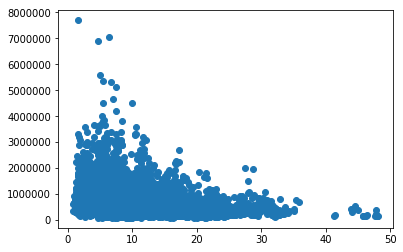

In [564]:
fig, ax = plt.subplots()

ax.scatter(df_distance['miles_to_flatiron'],df_distance['price'])
plt.show()

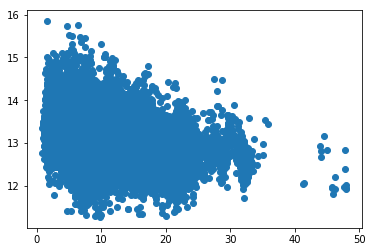

In [563]:
fig, ax = plt.subplots()

ax.scatter(df_distance['miles_to_flatiron'],np.log(df_distance['price']))
plt.show()

# Model 6 - Log transformed `Price` + Stepwise Selection

Here we will build on Model 3 by running it through a stepwise selection algorithm to see if it can determine a more 'optimized' subset of variables.


We will need a Stepwise Selection algorithm; we will just use the one from the textbook!

In [539]:
#import statsmodels.api as sm

def stepwise_selection(X, y, 
                       initial_list=[], 
                       threshold_in=0.01, 
                       threshold_out = 0.05, 
                       verbose=True):
    """ Perform a forward-backward feature selection 
    based on p-value from statsmodels.api.OLS
    Arguments:
        X - pandas.DataFrame with candidate features
        y - list-like with the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features 
    Always set threshold_in < threshold_out to avoid infinite looping.
    See https://en.wikipedia.org/wiki/Stepwise_regression for the details
    """
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        print("now performing forward step")
        excluded = list(set(X.columns)-set(included))
        print(excluded)
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            print("new column is:" + new_column)
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        print(new_pval)
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # backward step
        print("now performing backward step")
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        print("Now here are the pvalues for the BW:")
        print(pvalues)
        
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.argmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

Let's see what the selected variables are!

In [540]:
sw_selected = stepwise_selection(df3b, np.log(df['price']), verbose = True)

now performing forward step
['98056', '98030', '98014', '98031', '98002', '98040', '98065', '98155', 'sqft_lot15', '98023', 'view_3.0', '98177', 'cond_4', '98133', '98027', '98074', '98119', '98070', '98102', '98125', '98042', 'sqft_above_log', '98109', 'sqft_above', 'view_0.0', '98045', '98116', '98122', 'long', '98055', '98072', 'sqft_lot_log', 'view_1.0', '98059', '98117', '98198', 'sqft_basement', '98178', 'view_2.0', 'cond_3', '98038', '98136', '98022', '98077', 'sqft_living15_log', '98024', 'cond_1', '98105', 'cond_2', '98019', '98108', '98011', '98010', 'yr_built', '98112', 'bedrooms', 'bathrooms_log', '98188', 'bedrooms_log', 'grade', 'yr_renovated', '98092', 'sqft_living15', '98126', '98168', '98146', '98058', '98148', 'bathrooms', '98052', '98118', '98034', '98003', '98001', '98004', '98199', '98028', '98039', '98053', '98106', '98166', '98033', '98075', 'wf_0.0', 'lat', '98032']
new column is:98056
new column is:98030
new column is:98014
new column is:98031
new column is:980

new column is:98042
new column is:98109
new column is:sqft_above
new column is:98045
new column is:98116
new column is:98122
new column is:long
new column is:98055
new column is:98072
new column is:sqft_lot_log
new column is:view_1.0
new column is:98059
new column is:98117
new column is:98198
new column is:sqft_basement
new column is:98178
new column is:view_2.0
new column is:cond_3
new column is:98038
new column is:98136
new column is:98022
new column is:98077
new column is:sqft_living15_log
new column is:98024
new column is:cond_1
new column is:98105
new column is:cond_2
new column is:98019
new column is:98108
new column is:98011
new column is:98010
new column is:yr_built
new column is:98112
new column is:bedrooms
new column is:bathrooms_log
new column is:98188
new column is:bedrooms_log
new column is:grade
new column is:yr_renovated
new column is:98092
new column is:sqft_living15
new column is:98126
new column is:98168
new column is:98146
new column is:98058
new column is:98148
new 

new column is:98014
new column is:98031
new column is:98002
new column is:98040
new column is:98065
new column is:98155
new column is:sqft_lot15
new column is:98023
new column is:view_3.0
new column is:98177
new column is:cond_4
new column is:98133
new column is:98027
new column is:98074
new column is:98119
new column is:98070
new column is:98102
new column is:98125
new column is:98042
new column is:98109
new column is:sqft_above
new column is:98045
new column is:98116
new column is:98122
new column is:long
new column is:98055
new column is:98072
new column is:sqft_lot_log
new column is:view_1.0
new column is:98059
new column is:98117
new column is:98198
new column is:98178
new column is:view_2.0
new column is:cond_3
new column is:98038
new column is:98136
new column is:98022
new column is:98077
new column is:sqft_living15_log
new column is:98024
new column is:cond_1
new column is:98105
new column is:cond_2
new column is:98019
new column is:98108
new column is:98011
new column is:98010

new column is:98023
new column is:view_3.0
new column is:98177
new column is:cond_4
new column is:98133
new column is:98027
new column is:98074
new column is:98119
new column is:98070
new column is:98102
new column is:98125
new column is:98042
new column is:98109
new column is:sqft_above
new column is:98045
new column is:98116
new column is:98122
new column is:long
new column is:98055
new column is:98072
new column is:sqft_lot_log
new column is:view_1.0
new column is:98059
new column is:98117
new column is:98198
new column is:98178
new column is:view_2.0
new column is:cond_3
new column is:98038
new column is:98136
new column is:98022
new column is:98077
new column is:sqft_living15_log
new column is:98024
new column is:cond_1
new column is:98105
new column is:cond_2
new column is:98019
new column is:98108
new column is:98011
new column is:98010
new column is:98112
new column is:bedrooms
new column is:bathrooms_log
new column is:98188
new column is:bedrooms_log
new column is:yr_renovated

new column is:98002
new column is:98040
new column is:98065
new column is:sqft_lot15
new column is:98023
new column is:view_3.0
new column is:98177
new column is:cond_4
new column is:98133
new column is:98027
new column is:98074
new column is:98119
new column is:98070
new column is:98102
new column is:98125
new column is:98042
new column is:98109
new column is:sqft_above
new column is:98045
new column is:98116
new column is:98122
new column is:long
new column is:98055
new column is:98072
new column is:sqft_lot_log
new column is:view_1.0
new column is:98059
new column is:98117
new column is:98198
new column is:98178
new column is:view_2.0
new column is:cond_3
new column is:98038
new column is:98136
new column is:98022
new column is:98077
new column is:sqft_living15_log
new column is:98024
new column is:cond_1
new column is:98105
new column is:cond_2
new column is:98019
new column is:98108
new column is:98011
new column is:98010
new column is:98112
new column is:bedrooms
new column is:ba

new column is:98065
new column is:sqft_lot15
new column is:98023
new column is:view_3.0
new column is:98177
new column is:cond_4
new column is:98027
new column is:98074
new column is:98119
new column is:98070
new column is:98102
new column is:98125
new column is:98042
new column is:98109
new column is:sqft_above
new column is:98045
new column is:98116
new column is:98122
new column is:long
new column is:98055
new column is:98072
new column is:sqft_lot_log
new column is:view_1.0
new column is:98059
new column is:98117
new column is:98198
new column is:98178
new column is:view_2.0
new column is:cond_3
new column is:98038
new column is:98136
new column is:98022
new column is:98077
new column is:sqft_living15_log
new column is:98024
new column is:cond_1
new column is:98105
new column is:cond_2
new column is:98019
new column is:98108
new column is:98011
new column is:98010
new column is:98112
new column is:bedrooms
new column is:bathrooms_log
new column is:98188
new column is:bedrooms_log
n

Now here are the pvalues for the BW:
sqft_above_log     0.000000e+00
view_0.0          1.310982e-170
sqft_basement      0.000000e+00
grade              0.000000e+00
yr_built           0.000000e+00
lat                0.000000e+00
98004             4.859145e-304
98155             3.225829e-195
98133             6.725781e-158
98040             5.956685e-131
wf_0.0            2.681503e-131
98028             1.380152e-123
dtype: float64
now performing forward step
['98056', '98030', '98014', '98031', '98002', '98065', 'sqft_lot15', '98023', 'view_3.0', '98177', 'cond_4', '98027', '98074', '98119', '98070', '98102', '98125', '98042', '98109', 'sqft_above', '98045', '98116', '98122', 'long', '98055', '98072', 'sqft_lot_log', 'view_1.0', '98059', '98117', '98198', '98178', 'view_2.0', 'cond_3', '98038', '98136', '98022', '98077', 'sqft_living15_log', '98024', 'cond_1', '98105', 'cond_2', '98019', '98108', '98011', '98010', '98112', 'bedrooms', 'bathrooms_log', '98188', 'bedrooms_log', 'yr_reno

new column is:98002
new column is:98065
new column is:sqft_lot15
new column is:98023
new column is:view_3.0
new column is:98177
new column is:cond_4
new column is:98027
new column is:98074
new column is:98119
new column is:98070
new column is:98102
new column is:98125
new column is:98042
new column is:98109
new column is:sqft_above
new column is:98045
new column is:98116
new column is:98122
new column is:long
new column is:98055
new column is:98072
new column is:sqft_lot_log
new column is:view_1.0
new column is:98059
new column is:98117
new column is:98198
new column is:98178
new column is:view_2.0
new column is:cond_3
new column is:98038
new column is:98136
new column is:98022
new column is:98077
new column is:sqft_living15_log
new column is:98024
new column is:cond_1
new column is:98105
new column is:cond_2
new column is:98108
new column is:98011
new column is:98010
new column is:bedrooms
new column is:bathrooms_log
new column is:98188
new column is:bedrooms_log
new column is:yr_reno

new column is:sqft_lot15
new column is:98023
new column is:view_3.0
new column is:98177
new column is:cond_4
new column is:98027
new column is:98074
new column is:98119
new column is:98070
new column is:98102
new column is:98125
new column is:98042
new column is:98109
new column is:sqft_above
new column is:98045
new column is:98116
new column is:98122
new column is:long
new column is:98055
new column is:98072
new column is:sqft_lot_log
new column is:view_1.0
new column is:98059
new column is:98117
new column is:98198
new column is:98178
new column is:view_2.0
new column is:cond_3
new column is:98038
new column is:98136
new column is:98022
new column is:98077
new column is:sqft_living15_log
new column is:98024
new column is:cond_1
new column is:98105
new column is:cond_2
new column is:98108
new column is:98011
new column is:98010
new column is:bedrooms
new column is:bathrooms_log
new column is:98188
new column is:bedrooms_log
new column is:yr_renovated
new column is:98092
new column is:

new column is:sqft_lot15
new column is:98023
new column is:view_3.0
new column is:98177
new column is:cond_4
new column is:98027
new column is:98074
new column is:98119
new column is:98070
new column is:98102
new column is:98125
new column is:98042
new column is:98109
new column is:sqft_above
new column is:98045
new column is:98116
new column is:98122
new column is:long
new column is:98055
new column is:98072
new column is:sqft_lot_log
new column is:view_1.0
new column is:98059
new column is:98117
new column is:98198
new column is:98178
new column is:view_2.0
new column is:cond_3
new column is:98038
new column is:98136
new column is:98022
new column is:98077
new column is:sqft_living15_log
new column is:98024
new column is:cond_1
new column is:98105
new column is:cond_2
new column is:98108
new column is:98010
new column is:bedrooms
new column is:bathrooms_log
new column is:98188
new column is:bedrooms_log
new column is:yr_renovated
new column is:98092
new column is:sqft_living15
new co

new column is:98065
new column is:sqft_lot15
new column is:98023
new column is:view_3.0
new column is:98177
new column is:cond_4
new column is:98027
new column is:98074
new column is:98119
new column is:98070
new column is:98102
new column is:98042
new column is:98109
new column is:sqft_above
new column is:98045
new column is:98116
new column is:98122
new column is:long
new column is:98055
new column is:sqft_lot_log
new column is:view_1.0
new column is:98059
new column is:98117
new column is:98198
new column is:98178
new column is:view_2.0
new column is:cond_3
new column is:98038
new column is:98136
new column is:98022
new column is:98077
new column is:sqft_living15_log
new column is:98024
new column is:cond_1
new column is:98105
new column is:cond_2
new column is:98108
new column is:98010
new column is:bedrooms
new column is:bathrooms_log
new column is:98188
new column is:bedrooms_log
new column is:yr_renovated
new column is:98092
new column is:sqft_living15
new column is:98126
new co

new column is:98056
new column is:cond_2
new column is:98030
new column is:98014
new column is:98002
new column is:98031
new column is:98065
new column is:98108
new column is:sqft_lot15
new column is:98023
new column is:view_3.0
new column is:98010
new column is:cond_4
new column is:bedrooms
new column is:98027
new column is:bathrooms_log
new column is:98188
new column is:98074
new column is:98119
new column is:98070
new column is:bedrooms_log
new column is:98102
new column is:98042
new column is:98109
new column is:sqft_above
new column is:yr_renovated
new column is:98045
new column is:98092
new column is:98116
new column is:98122
new column is:sqft_living15
new column is:98126
new column is:98146
new column is:long
new column is:98058
new column is:98055
new column is:98148
new column is:bathrooms
new column is:sqft_lot_log
new column is:98052
new column is:view_1.0
new column is:98118
new column is:98003
new column is:98001
new column is:98059
new column is:98117
new column is:98198

Now here are the pvalues for the BW:
sqft_above_log        0.000000e+00
view_0.0             1.358713e-175
sqft_basement         0.000000e+00
grade                 0.000000e+00
yr_built             3.255167e-248
lat                   0.000000e+00
98004                1.362289e-303
98155                 0.000000e+00
98133                 0.000000e+00
98040                1.002966e-138
wf_0.0               4.611200e-192
98028                2.865047e-303
98112                6.213013e-107
98019                2.890722e-218
98039                 3.344373e-94
98168                6.354279e-107
98011                9.356564e-189
98034                4.766934e-200
98072                9.972107e-192
98125                1.154770e-146
98077                5.384180e-148
98177                5.905855e-122
sqft_living15_log    5.341166e-115
98022                7.271688e-100
dtype: float64
now performing forward step
['98105', '98056', 'cond_2', '98030', '98014', '98002', '98031', '98065', '98108

new column is:98031
new column is:98002
new column is:98065
new column is:98108
new column is:sqft_lot15
new column is:98023
new column is:view_3.0
new column is:98010
new column is:cond_4
new column is:bedrooms
new column is:98027
new column is:bathrooms_log
new column is:98188
new column is:98074
new column is:98119
new column is:98070
new column is:bedrooms_log
new column is:98102
new column is:98042
new column is:98109
new column is:sqft_above
new column is:yr_renovated
new column is:98045
new column is:98092
new column is:98116
new column is:98122
new column is:sqft_living15
new column is:98126
new column is:98146
new column is:long
new column is:98058
new column is:98055
new column is:98148
new column is:bathrooms
new column is:sqft_lot_log
new column is:98052
new column is:view_1.0
new column is:98118
new column is:98003
new column is:98001
new column is:98059
new column is:98117
new column is:98198
new column is:98199
new column is:98053
new column is:view_2.0
new column is:981

new column is:cond_2
new column is:98030
new column is:98031
new column is:98002
new column is:98065
new column is:98108
new column is:sqft_lot15
new column is:98023
new column is:view_3.0
new column is:98010
new column is:cond_4
new column is:bedrooms
new column is:98027
new column is:bathrooms_log
new column is:98188
new column is:98074
new column is:98119
new column is:98070
new column is:bedrooms_log
new column is:98102
new column is:98042
new column is:98109
new column is:sqft_above
new column is:yr_renovated
new column is:98045
new column is:98092
new column is:98116
new column is:98122
new column is:sqft_living15
new column is:98126
new column is:98146
new column is:long
new column is:98058
new column is:98055
new column is:98148
new column is:bathrooms
new column is:sqft_lot_log
new column is:view_1.0
new column is:98118
new column is:98003
new column is:98001
new column is:98059
new column is:98117
new column is:98198
new column is:98199
new column is:view_2.0
new column is:98

new column is:98030
new column is:98031
new column is:98002
new column is:98065
new column is:98108
new column is:98023
new column is:view_3.0
new column is:98010
new column is:cond_4
new column is:bedrooms
new column is:98027
new column is:bathrooms_log
new column is:98188
new column is:98074
new column is:98119
new column is:98070
new column is:bedrooms_log
new column is:98102
new column is:98042
new column is:98109
new column is:sqft_above
new column is:yr_renovated
new column is:98045
new column is:98092
new column is:98116
new column is:98122
new column is:sqft_living15
new column is:98126
new column is:98146
new column is:long
new column is:98058
new column is:98055
new column is:98148
new column is:sqft_lot_log
new column is:view_1.0
new column is:98118
new column is:98003
new column is:98001
new column is:98059
new column is:98117
new column is:98198
new column is:98199
new column is:view_2.0
new column is:98106
new column is:cond_3
new column is:98038
new column is:98166
new c

new column is:98031
new column is:98002
new column is:98065
new column is:98108
new column is:98023
new column is:view_3.0
new column is:98010
new column is:cond_4
new column is:bedrooms
new column is:98027
new column is:bathrooms_log
new column is:98188
new column is:98074
new column is:98119
new column is:98070
new column is:bedrooms_log
new column is:98102
new column is:98042
new column is:98109
new column is:sqft_above
new column is:yr_renovated
new column is:98045
new column is:98092
new column is:98122
new column is:sqft_living15
new column is:98126
new column is:98146
new column is:long
new column is:98058
new column is:98055
new column is:98148
new column is:sqft_lot_log
new column is:view_1.0
new column is:98118
new column is:98003
new column is:98001
new column is:98059
new column is:98117
new column is:98198
new column is:98199
new column is:view_2.0
new column is:98106
new column is:98038
new column is:98166
new column is:98136
new column is:98033
new column is:98075
new co

new column is:98031
new column is:98002
new column is:98065
new column is:98108
new column is:98023
new column is:view_3.0
new column is:98010
new column is:cond_4
new column is:bedrooms
new column is:98027
new column is:bathrooms_log
new column is:98188
new column is:98074
new column is:98070
new column is:bedrooms_log
new column is:98102
new column is:98042
new column is:98109
new column is:sqft_above
new column is:yr_renovated
new column is:98045
new column is:98092
new column is:98122
new column is:sqft_living15
new column is:98126
new column is:98146
new column is:long
new column is:98058
new column is:98055
new column is:98148
new column is:sqft_lot_log
new column is:view_1.0
new column is:98118
new column is:98003
new column is:98001
new column is:98059
new column is:98117
new column is:98198
new column is:98199
new column is:view_2.0
new column is:98106
new column is:98038
new column is:98166
new column is:98033
new column is:98075
new column is:98032
new column is:98024
new co

new column is:cond_2
new column is:98030
new column is:98031
new column is:98002
new column is:98065
new column is:98108
new column is:98023
new column is:view_3.0
new column is:98010
new column is:cond_4
new column is:bedrooms
new column is:98027
new column is:bathrooms_log
new column is:98188
new column is:98070
new column is:bedrooms_log
new column is:98102
new column is:98042
new column is:98109
new column is:sqft_above
new column is:yr_renovated
new column is:98045
new column is:98092
new column is:98122
new column is:sqft_living15
new column is:98126
new column is:98146
new column is:long
new column is:98058
new column is:98148
new column is:sqft_lot_log
new column is:view_1.0
new column is:98118
new column is:98003
new column is:98001
new column is:98059
new column is:98117
new column is:98198
new column is:98199
new column is:view_2.0
new column is:98106
new column is:98038
new column is:98166
new column is:98033
new column is:98075
new column is:98032
new column is:98024
new c

new column is:98030
new column is:98031
new column is:98002
new column is:98065
new column is:98108
new column is:98023
new column is:view_3.0
new column is:98010
new column is:cond_4
new column is:bedrooms
new column is:98027
new column is:bathrooms_log
new column is:98188
new column is:98070
new column is:bedrooms_log
new column is:98102
new column is:98042
new column is:sqft_above
new column is:yr_renovated
new column is:98045
new column is:98092
new column is:98122
new column is:sqft_living15
new column is:98126
new column is:98146
new column is:long
new column is:98058
new column is:98148
new column is:view_1.0
new column is:98118
new column is:98003
new column is:98001
new column is:98059
new column is:98117
new column is:98198
new column is:98199
new column is:view_2.0
new column is:98106
new column is:98038
new column is:98166
new column is:98033
new column is:98075
new column is:98032
new column is:98024
new column is:cond_1
98105            2.670098e-28
98056            8.357

new column is:cond_2
new column is:98030
new column is:98031
new column is:98002
new column is:98065
new column is:98108
new column is:98023
new column is:view_3.0
new column is:98010
new column is:cond_4
new column is:bedrooms
new column is:98027
new column is:bathrooms_log
new column is:98188
new column is:98070
new column is:bedrooms_log
new column is:98102
new column is:98042
new column is:sqft_above
new column is:yr_renovated
new column is:98045
new column is:98092
new column is:sqft_living15
new column is:98126
new column is:98146
new column is:long
new column is:98148
new column is:view_1.0
new column is:98118
new column is:98003
new column is:98001
new column is:98059
new column is:98117
new column is:98198
new column is:98199
new column is:view_2.0
new column is:98106
new column is:98038
new column is:98166
new column is:98033
new column is:98075
new column is:98032
new column is:98024
new column is:cond_1
98105            7.525767e-32
98056            1.571182e-22
cond_2     

new column is:98031
new column is:98065
new column is:98002
new column is:98108
new column is:98023
new column is:view_3.0
new column is:98010
new column is:cond_4
new column is:bedrooms
new column is:98027
new column is:bathrooms_log
new column is:98188
new column is:98070
new column is:bedrooms_log
new column is:98042
new column is:sqft_above
new column is:yr_renovated
new column is:98045
new column is:98092
new column is:sqft_living15
new column is:98126
new column is:98146
new column is:long
new column is:98148
new column is:view_1.0
new column is:98118
new column is:98003
new column is:98001
new column is:98059
new column is:98117
new column is:98198
new column is:98199
new column is:view_2.0
new column is:98106
new column is:98038
new column is:98166
new column is:98033
new column is:98075
new column is:98032
new column is:98024
new column is:cond_1
98105            7.862444e-35
98056            2.721486e-23
98030            2.890630e-06
98031            4.306630e-23
98065       

new column is:98030
new column is:98031
new column is:98065
new column is:98002
new column is:98108
new column is:98023
new column is:view_3.0
new column is:98010
new column is:cond_4
new column is:bedrooms
new column is:98027
new column is:bathrooms_log
new column is:98188
new column is:98070
new column is:bedrooms_log
new column is:98042
new column is:sqft_above
new column is:yr_renovated
new column is:98045
new column is:98092
new column is:sqft_living15
new column is:98126
new column is:98146
new column is:long
new column is:98148
new column is:view_1.0
new column is:98118
new column is:98003
new column is:98001
new column is:98059
new column is:98117
new column is:98198
new column is:view_2.0
new column is:98106
new column is:98038
new column is:98166
new column is:98033
new column is:98075
new column is:98032
new column is:98024
new column is:cond_1
98056            1.143656e-21
98030            1.121760e-06
98031            1.718750e-23
98065            7.228676e-08
98002       

new column is:98065
new column is:98002
new column is:98108
new column is:98023
new column is:view_3.0
new column is:bedrooms
new column is:98027
new column is:bathrooms_log
new column is:98188
new column is:98070
new column is:bedrooms_log
new column is:98042
new column is:sqft_above
new column is:yr_renovated
new column is:98045
new column is:98092
new column is:sqft_living15
new column is:98126
new column is:98146
new column is:long
new column is:98148
new column is:view_1.0
new column is:98118
new column is:98003
new column is:98001
new column is:98059
new column is:98117
new column is:98198
new column is:view_2.0
new column is:98106
new column is:98038
new column is:98166
new column is:98033
new column is:98075
new column is:98032
new column is:98024
new column is:cond_1
98056            1.610321e-23
98030            9.934541e-06
98031            4.725625e-22
98065            9.253655e-08
98002            1.082512e-02
98108            3.202183e-19
98023            3.974542e-01
vie

new column is:98065
new column is:98002
new column is:98108
new column is:98023
new column is:view_3.0
new column is:bedrooms
new column is:98027
new column is:bathrooms_log
new column is:98070
new column is:bedrooms_log
new column is:98042
new column is:sqft_above
new column is:yr_renovated
new column is:98045
new column is:98092
new column is:sqft_living15
new column is:98126
new column is:98146
new column is:long
new column is:98148
new column is:view_1.0
new column is:98118
new column is:98003
new column is:98001
new column is:98059
new column is:98117
new column is:98198
new column is:view_2.0
new column is:98106
new column is:98038
new column is:98166
new column is:98033
new column is:98075
new column is:98032
new column is:98024
98056            2.293642e-25
98030            2.594406e-06
98031            1.865241e-23
98065            6.068290e-08
98002            2.413083e-02
98108            4.022005e-20
98023            5.720172e-01
view_3.0         5.369321e-06
bedrooms      

new column is:98031
new column is:98065
new column is:98002
new column is:98108
new column is:98023
new column is:view_3.0
new column is:bedrooms
new column is:98027
new column is:bathrooms_log
new column is:98070
new column is:bedrooms_log
new column is:98042
new column is:yr_renovated
new column is:98045
new column is:98092
new column is:sqft_living15
new column is:98126
new column is:98146
new column is:long
new column is:98148
new column is:view_1.0
new column is:98118
new column is:98003
new column is:98001
new column is:98059
new column is:98117
new column is:98198
new column is:view_2.0
new column is:98106
new column is:98038
new column is:98166
new column is:98033
new column is:98075
new column is:98032
new column is:98024
98030            1.677115e-06
98031            2.976407e-24
98065            6.055246e-10
98002            6.908338e-02
98108            8.310356e-22
98023            7.961680e-01
view_3.0         3.678607e-06
bedrooms         6.782392e-12
98027            1.

/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:53: FutureWarning: 'argmax' is deprecated, use 'idxmax' instead. The behavior of 'argmax'
will be corrected to return the positional maximum in the future.
Use 'series.values.argmax' to get the position of the maximum now.


new column is:98108
new column is:sqft_lot15
new column is:98023
new column is:view_3.0
new column is:bedrooms
new column is:98027
new column is:bathrooms_log
new column is:98070
new column is:bedrooms_log
new column is:98042
new column is:yr_renovated
new column is:98045
new column is:98092
new column is:sqft_living15
new column is:98126
new column is:98146
new column is:long
new column is:98148
new column is:view_1.0
new column is:98118
new column is:98003
new column is:98001
new column is:98059
new column is:98117
new column is:98198
new column is:view_2.0
new column is:98038
new column is:98166
new column is:98033
new column is:98075
new column is:98032
new column is:98024
98030            3.131732e-08
98065            2.621997e-11
98002            2.809264e-01
98108            3.106665e-24
sqft_lot15       7.462587e-02
98023            3.840301e-01
view_3.0         3.193699e-06
bedrooms         3.336860e-11
98027            9.904788e-07
bathrooms_log    2.606672e-06
98070         

new column is:98065
new column is:98002
new column is:sqft_lot15
new column is:98023
new column is:view_3.0
new column is:bedrooms
new column is:98027
new column is:bathrooms_log
new column is:98070
new column is:bedrooms_log
new column is:98042
new column is:yr_renovated
new column is:98045
new column is:98092
new column is:sqft_living15
new column is:98126
new column is:long
new column is:98148
new column is:view_1.0
new column is:98118
new column is:98003
new column is:98001
new column is:98059
new column is:98117
new column is:98198
new column is:view_2.0
new column is:98038
new column is:98166
new column is:98033
new column is:98075
new column is:98032
new column is:98024
98030            2.226516e-09
98065            1.704988e-12
98002            5.722088e-01
sqft_lot15       1.125626e-01
98023            1.273690e-01
view_3.0         2.151697e-06
bedrooms         6.597832e-11
98027            5.878906e-06
bathrooms_log    4.504901e-06
98070            4.676379e-06
bedrooms_log  

new column is:98023
new column is:view_3.0
new column is:bedrooms
new column is:98027
new column is:bathrooms_log
new column is:98070
new column is:bedrooms_log
new column is:98042
new column is:yr_renovated
new column is:98045
new column is:98092
new column is:sqft_living15
new column is:98126
new column is:long
new column is:98148
new column is:view_1.0
new column is:98118
new column is:98003
new column is:98001
new column is:98059
new column is:98117
new column is:view_2.0
new column is:98038
new column is:98166
new column is:98033
new column is:98075
new column is:98024
98030            8.510361e-12
98065            3.747836e-13
98002            6.410998e-01
sqft_lot15       2.018547e-01
98023            1.662328e-03
view_3.0         1.714458e-06
bedrooms         2.441864e-10
98027            2.458914e-05
bathrooms_log    1.195696e-05
98070            4.933485e-05
bedrooms_log     1.219437e-07
98042            8.028282e-15
yr_renovated     3.032575e-18
98045            2.002279e-03

new column is:98070
new column is:bedrooms_log
new column is:98042
new column is:98045
new column is:98092
new column is:sqft_living15
new column is:98126
new column is:98148
new column is:view_1.0
new column is:98118
new column is:98003
new column is:98001
new column is:98059
new column is:98117
new column is:view_2.0
new column is:98038
new column is:98166
new column is:98033
new column is:98075
new column is:98024
98030            3.650108e-12
98065            2.071528e-05
98002            6.663402e-01
sqft_lot15       5.461588e-01
98023            8.109153e-10
view_3.0         6.416515e-06
bedrooms         2.228814e-09
98027            2.790179e-09
bathrooms_log    4.398705e-05
98070            8.429378e-02
bedrooms_log     1.113863e-06
98042            7.092777e-13
98045            3.860958e-01
98092            9.156519e-05
sqft_living15    4.994603e-02
98126            1.883805e-05
98148            1.111670e-07
view_1.0         5.741645e-04
98118            3.269788e-07
98003    

new column is:98117
new column is:98038
new column is:98166
new column is:98033
new column is:98075
new column is:98024
98030            3.570184e-12
98065            1.786521e-05
98002            6.177514e-01
sqft_lot15       7.020679e-01
98023            1.231927e-09
view_3.0         9.935621e-13
bedrooms         1.407080e-08
98027            9.434630e-10
bathrooms_log    3.851753e-06
98070            1.024660e-01
bedrooms_log     6.091338e-06
98042            5.445418e-13
98045            4.050875e-01
98092            8.900601e-05
sqft_living15    5.395185e-03
98126            8.811378e-06
98148            8.611358e-08
98118            1.813403e-07
98003            1.820159e-01
98001            3.572182e-01
98059            1.207150e-13
98117            2.774644e-02
98038            9.905798e-15
98166            2.427752e-03
98033            1.214078e-05
98075            3.843283e-06
98024            1.046530e-06
dtype: float64
Add  98038                          with p-value 9.9058

new column is:98065
new column is:98002
new column is:sqft_lot15
new column is:98023
new column is:bedrooms
new column is:bathrooms_log
new column is:98070
new column is:bedrooms_log
new column is:98042
new column is:98045
new column is:98092
new column is:sqft_living15
new column is:98126
new column is:98148
new column is:98118
new column is:98003
new column is:98001
new column is:98059
new column is:98117
new column is:98166
new column is:98033
new column is:98075
new column is:98024
98030            1.032046e-09
98065            2.309773e-02
98002            7.594788e-01
sqft_lot15       7.728833e-01
98023            3.405090e-08
bedrooms         1.148097e-07
bathrooms_log    2.680210e-06
98070            7.220550e-02
bedrooms_log     4.949360e-05
98042            3.296049e-08
98045            1.078633e-03
98092            1.030398e-07
sqft_living15    9.916156e-03
98126            1.433586e-05
98148            1.327059e-07
98118            1.027124e-06
98003            4.822060e-01

new column is:98002
new column is:sqft_lot15
new column is:98023
new column is:bedrooms
new column is:bathrooms_log
new column is:98070
new column is:bedrooms_log
new column is:98045
new column is:98092
new column is:sqft_living15
new column is:98126
new column is:98148
new column is:98118
new column is:98003
new column is:98001
new column is:98117
new column is:98166
new column is:98033
new column is:98075
new column is:98024
98065            2.672640e-05
98002            1.932816e-01
sqft_lot15       4.922319e-01
98023            9.352801e-16
bedrooms         3.468606e-07
bathrooms_log    1.285900e-06
98070            2.028448e-01
bedrooms_log     1.310177e-04
98045            1.606783e-01
98092            2.013894e-03
sqft_living15    7.373594e-03
98126            6.832868e-05
98148            9.722341e-09
98118            1.578664e-08
98003            1.835205e-02
98001            2.796615e-02
98117            1.113548e-02
98166            1.860230e-04
98033            1.385454e-05

Now here are the pvalues for the BW:
sqft_above_log        1.477030e-81
view_0.0             1.389170e-101
sqft_basement        4.544906e-247
grade                 0.000000e+00
yr_built              1.816047e-08
lat                   0.000000e+00
98004                 0.000000e+00
98155                 0.000000e+00
98133                 0.000000e+00
98040                1.078764e-136
wf_0.0               2.398668e-114
98028                 0.000000e+00
98112                9.395956e-172
98019                 0.000000e+00
98039                 7.384100e-95
98168                1.033268e-191
98011                7.875059e-309
98034                 0.000000e+00
98072                 0.000000e+00
98125                3.810680e-248
98077                4.942375e-274
98177                8.007930e-214
sqft_living15_log    1.446607e-144
98022                 3.546846e-75
98178                5.607431e-126
98014                2.668778e-130
98052                 1.021346e-88
98053             

new column is:98065
new column is:98002
new column is:98166
new column is:sqft_lot15
new column is:98045
new column is:98092
new column is:98033
new column is:98075
new column is:98117
new column is:bedrooms
new column is:sqft_living15
new column is:98126
new column is:bathrooms_log
new column is:98024
new column is:98070
new column is:bedrooms_log
98038            2.345282e-01
98065            1.376389e-04
98002            2.299672e-12
98166            1.707767e-16
sqft_lot15       6.635354e-02
98045            1.475855e-01
98092            4.698156e-06
98033            1.483379e-03
98075            2.663960e-05
98117            1.998328e-03
bedrooms         1.045467e-06
sqft_living15    2.712205e-03
98126            5.412275e-01
bathrooms_log    7.370856e-07
98024            1.256121e-05
98070            1.104543e-02
bedrooms_log     5.140967e-04
dtype: float64
Add  98166                          with p-value 1.70777e-16
now performing backward step
Now here are the pvalues for the B

new column is:sqft_lot15
new column is:98045
new column is:98033
new column is:98075
new column is:98117
new column is:bedrooms
new column is:sqft_living15
new column is:98126
new column is:bathrooms_log
new column is:98024
new column is:98070
new column is:bedrooms_log
98038            9.054749e-19
98065            2.844580e-03
sqft_lot15       4.827423e-03
98045            1.024036e-01
98033            1.936737e-01
98075            5.696059e-04
98117            9.483507e-04
bedrooms         1.155950e-05
sqft_living15    2.631374e-03
98126            1.055440e-04
bathrooms_log    1.231644e-06
98024            1.004574e-04
98070            1.760541e-17
bedrooms_log     3.926011e-03
dtype: float64
Add  98038                          with p-value 9.05475e-19
now performing backward step
Now here are the pvalues for the BW:
sqft_above_log        6.142199e-88
view_0.0             8.766545e-103
sqft_basement        1.061414e-255
grade                 0.000000e+00
yr_built              1.203

new column is:sqft_lot15
new column is:98045
new column is:98033
new column is:98075
new column is:98116
new column is:98117
new column is:98010
new column is:bedrooms
new column is:sqft_living15
new column is:98027
new column is:bathrooms_log
new column is:98024
new column is:bedrooms_log
98065            2.876771e-02
sqft_lot15       9.612668e-03
98045            6.703878e-01
98033            8.339483e-03
98075            6.572584e-03
98116            8.286983e-02
98117            2.175197e-06
98010            3.550025e-08
bedrooms         1.230686e-06
sqft_living15    4.633905e-04
98027            2.505644e-02
bathrooms_log    5.207048e-07
98024            4.040115e-04
bedrooms_log     8.044909e-04
dtype: float64
Add  98010                          with p-value 3.55003e-08
now performing backward step
Now here are the pvalues for the BW:
sqft_above_log        9.882937e-90
view_0.0             1.565476e-101
sqft_basement        3.351531e-245
grade                 0.000000e+00
yr_buil

new column is:98065
new column is:sqft_lot15
new column is:98045
new column is:98033
new column is:98075
new column is:98116
new column is:98117
new column is:sqft_living15
new column is:98027
new column is:98024
new column is:bedrooms_log
bathrooms        0.745676
98065            0.008498
sqft_lot15       0.003933
98045            0.598538
98033            0.000345
98075            0.006647
98116            0.718782
98117            0.000006
sqft_living15    0.001383
98027            0.000751
98024            0.000179
bedrooms_log     0.008784
dtype: float64
Add  98117                          with p-value 6.05944e-06
now performing backward step
Now here are the pvalues for the BW:
sqft_above_log        2.360011e-71
view_0.0             1.521681e-101
sqft_basement        1.121613e-251
grade                 0.000000e+00
yr_built              5.232480e-06
lat                   2.262182e-91
98004                2.652156e-295
98155                 0.000000e+00
98133                 0.00

new column is:98065
new column is:sqft_lot15
new column is:98045
new column is:98033
new column is:98075
new column is:98116
new column is:sqft_living15
new column is:bedrooms_log
bathrooms        0.795085
98065            0.000762
sqft_lot15       0.018803
98045            0.189455
98033            0.006220
98075            0.000523
98116            0.513168
sqft_living15    0.001631
bedrooms_log     0.009650
dtype: float64
Add  98075                          with p-value 0.000523322
now performing backward step
Now here are the pvalues for the BW:
sqft_above_log        7.394111e-70
view_0.0             7.552579e-100
sqft_basement        9.975954e-250
grade                 0.000000e+00
yr_built              1.534806e-05
lat                   5.277389e-80
98004                2.826262e-283
98155                 0.000000e+00
98133                 0.000000e+00
98040                 3.890225e-52
wf_0.0               4.197418e-118
98028                1.291467e-275
98112                1.1

new column is:98033
new column is:98116
new column is:sqft_living15
new column is:bedrooms_log
bathrooms        0.778882
sqft_lot15       0.030664
98033            0.124419
98116            0.654980
sqft_living15    0.002252
bedrooms_log     0.010180
dtype: float64
Add  sqft_living15                  with p-value 0.00225157
now performing backward step
Now here are the pvalues for the BW:
sqft_above_log        5.617964e-53
view_0.0             7.239477e-103
sqft_basement        2.552273e-253
grade                 0.000000e+00
yr_built              2.233146e-06
lat                   4.288405e-69
98004                4.531160e-274
98155                 0.000000e+00
98133                 0.000000e+00
98040                 1.546467e-49
wf_0.0               1.523861e-116
98028                2.266760e-271
98112                2.283942e-133
98019                1.864130e-123
98039                 2.013023e-87
98168                 0.000000e+00
98011                4.075188e-159
98034        

In [542]:
len(sw_selected)

81

In [543]:
df3b.shape

(21597, 86)

In [ ]:
flatiron_school = (47.6098, -122.336)
df_distance = df.copy()
#test = haversine(flatiron_school, (df_distance['lat'],df_distance['long']) , unit='mi')


distance_keep = []
for index, row in df_distance.iterrows():
   print(row['lat'])
   distance_keep.append(haversine(flatiron_school, (row['lat'],row['long']) , unit='mi'))



# Appendix

### Below is preliminary EDA on the dataset.

---

### Import Data

In [11]:
df = pd.read_csv('kc_house_data.csv')

We are going to divide and conquer doing detailed EDA on the variables. Hussein will do the first 11 and I will do the rest.

In [12]:
#Make sure there are 21 columns
df.shape

(21597, 21)

In [13]:
cols_eda_2 = [col for col in df.columns][11:]

In [10]:
cols_eda_2.append('price')

In [14]:
# I also want price so can do scatter matrix
cols_eda_2.append('price')
cols_eda_2

['grade',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'zipcode',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15',
 'price']

In [15]:
# Now let's reduce down the dataset for convenience
df_eda_2 = df_half_2.loc[:,cols_eda_2]
df_eda_2.info()

NameError: name 'df_half_2' is not defined

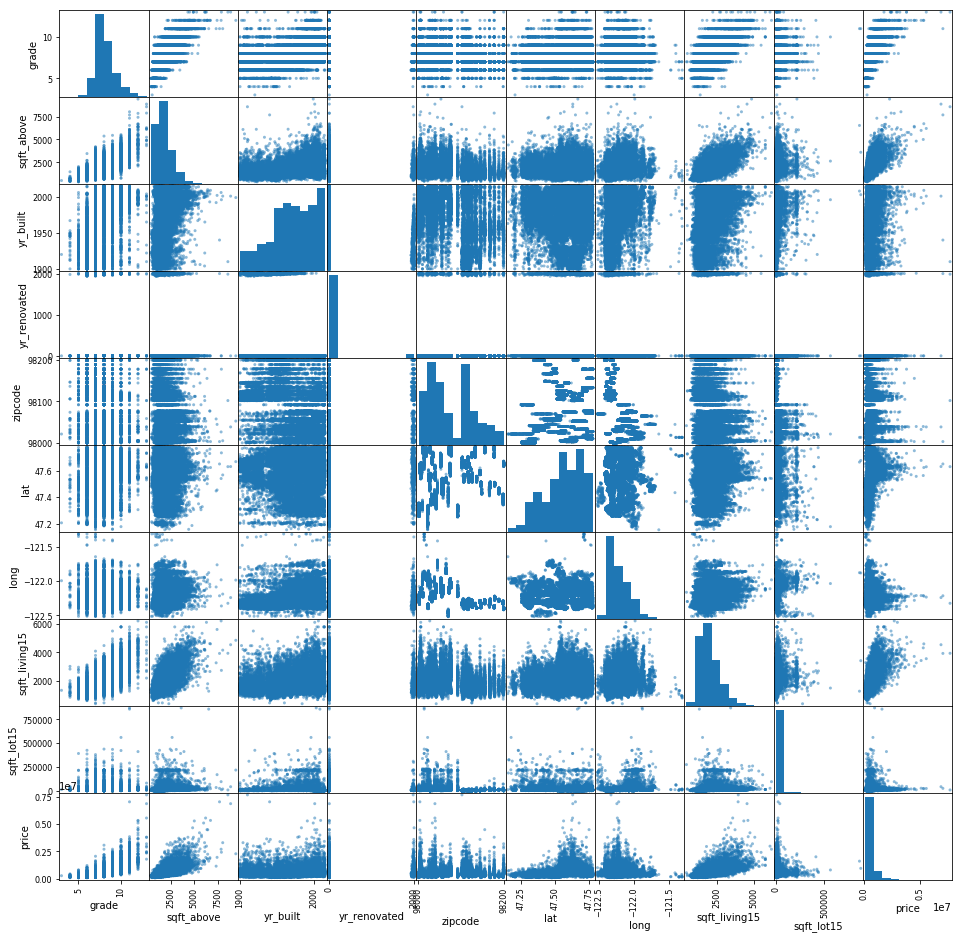

In [7]:
# Create scatter matrix
_ = pd.plotting.scatter_matrix(df_eda_2,figsize=(16,16))

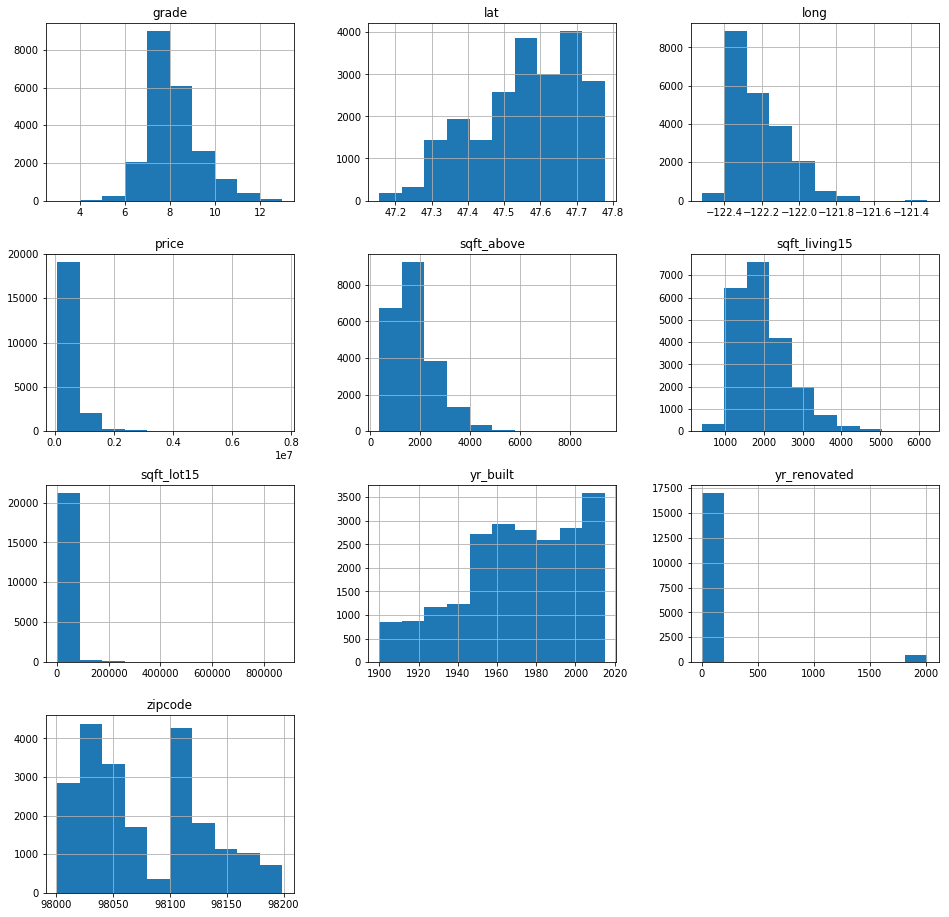

In [8]:
# Create histograms
_ = df_eda_2.hist(figsize=(16,16))

One last thing I might do is log transform price to see if that changes relationship with potential predictors.

In [9]:
df_eda_2['log_price'] = df_eda_2['price'].apply( np.log )

In [10]:
df_eda_2.head()

,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price,log_price
0,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,221900.0,12.309982
1,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,538000.0,13.195614
2,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062,180000.0,12.100712
3,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,604000.0,13.311329
4,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,510000.0,13.142166


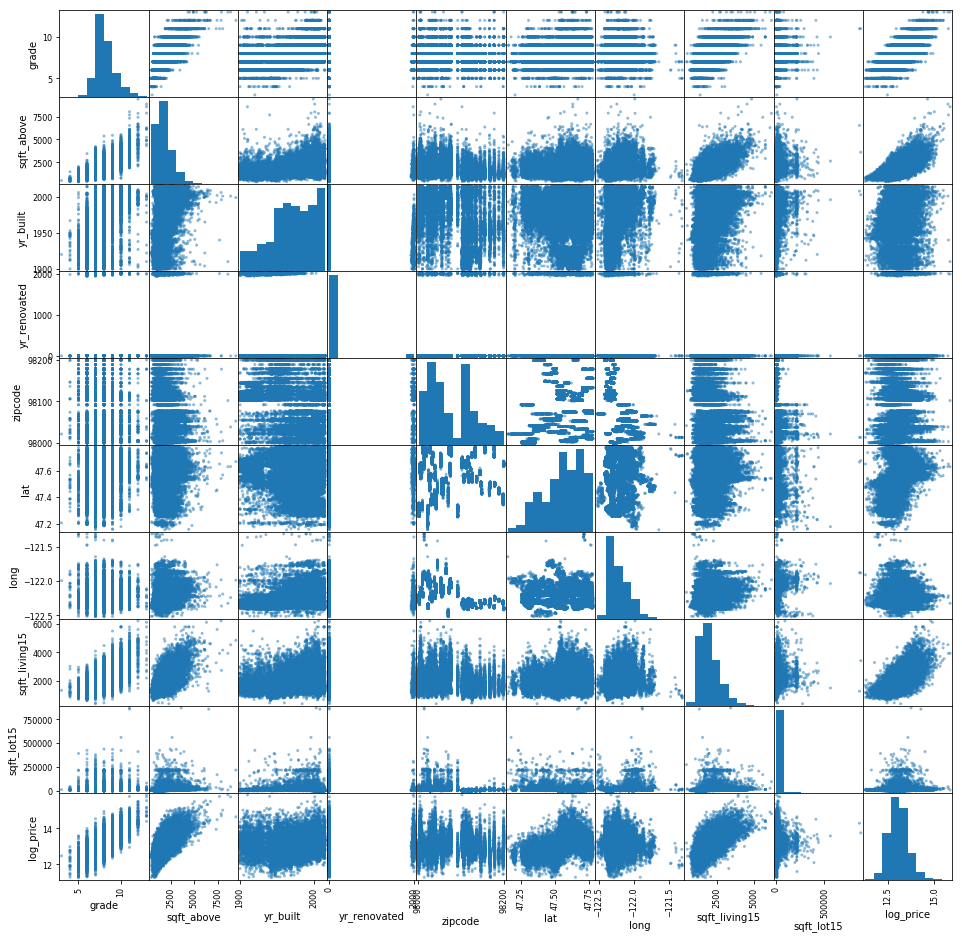

In [12]:
# Create scatter matrix
_ = pd.plotting.scatter_matrix(df_eda_2.drop(['price'],axis=1),figsize=(16,16))

When took the log of `price` it seems to show more linear realtions ships with many of my variables. So I think will recommend that we use `log_price` as our target variable.

### Initial observations and recommendations

- `grade` 
    - Appears to have linear relationship with, as well as being normally distributed 
    - No nulls
    - We confirmed that the King County scale is from 1-13.
    - <font color ="green">KEEP</font>
- `sqft_above`
    - No nulls
    - Appears to have linear relationship. Not normally distributed, but not sure if that's needed. 
    - <font color ="green">KEEP</font>
- `yr_built`
    - No nulls
    - After transformation of price it appears to have a linear relationship.
    - <font color ="green">KEEP</font>
- `sqft_basement`
    - Didn't get into the plots! Because it was an object. This was driven by `?` characters that were present in the column. Our initial idea is to transform it by assuming it is the difference between `sqft_totliving` and `sqft_above`. 
    - So we transformed the entire column by assuming as such:
            ` sqft_basement = sqft_totliving - sqft_above`
    - <font color ="red">NEED TO TRANSFORM</font>
- `yr_renovated`
    - There are a large number of nulls. We believe that it means that the house has not been renovated yet. There are also a large number with `0` entered, which we believe means the same thing. So for consistency of data we will transform the nulls all into `0`s.
    - <font color ="red">NEED TO TRANSFORM, replace `NaN` with 0</font>
- `zip code`
    - No nulls
    - But they are all `ints`. May need to scrub for zip+4. Also, think zip code should be considered to be more of a categorical variable. So think need to do two things:
    - 1. convert to `str`
    - 2. Truncate to 5 characters - (We confirmed it is!)
    - <font color ="red">NEED TO TRANSFORM</font>
- `lat` and `long`
    - No nulls
    - This appears to be very clean, with the caveat that some coordinates *may* fall out of King County.
    - <font color ="green">KEEP, but might want to see on a map</font>
- `sqft_living15`, `sqft_lot15`
    - No nulls
    - Distribution based on inspection of histogram seems reasonable.
    - <font color ="green">KEEP, for now</font>
    
    

        
    

---